# Comparação de Modelos de Classificação
## Código usado para comparar diferentes modelos de classificação em um dataset de Astronomia (SDSS).

In [1]:
# Importando bibliotecas essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exibindo mensagens informativas para cada passo
print("Bibliotecas importadas com sucesso!")

# Lendo o arquivo CSV (ajustando o separador se necessário)
file_path = 'sdss.csv'  # Substitua pelo caminho correto se estiver em outro ambiente
df = pd.read_csv(file_path, skiprows=1)
# Mantendo apenas as primeiras 50 mil linhas
#df = df.head(200000)

# Exibindo as 5 primeiras linhas para verificar se os dados foram carregados corretamente
print("Dados carregados com sucesso! Primeiras 5 linhas:")
print(df.head())

# Exibindo o tamanho do dataset
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")


Bibliotecas importadas com sucesso!
Dados carregados com sucesso! Primeiras 5 linhas:
                 objid          ra        dec         u         g         r  \
0  1237666211927687614  266.621864  26.717041  18.74441  17.24021  16.67171   
1  1237667538011422731  159.771218  22.902207  18.18608  18.04931  17.75193   
2  1237667538012012625  161.184315  23.139441  19.26410  17.77944  17.10706   
3  1237665126940475445  204.405758  32.316683  18.39461  17.40648  16.99087   
4  1237667209982246991  158.594356  26.142638  18.15396  17.23699  16.91828   

          i         z   run  rerun  camcol  field             specobjid  \
0  16.48060  16.37055  4828    301       6    116   2457961876630300672   
1  17.73256  17.78253  5137    301       4    308   7235187389022623744   
2  16.82521  16.66497  5137    301       4    317   3660407331679739904   
3  16.61687  16.49783  4576    301       1    557   2374552923406362624   
4  16.76634  16.73904  5061    301       1    292  1177932081803


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      500000 non-null  int64  
 1   ra         500000 non-null  float64
 2   dec        500000 non-null  float64
 3   u          500000 non-null  float64
 4   g          500000 non-null  float64
 5   r          500000 non-null  float64
 6   i          500000 non-null  float64
 7   z          500000 non-null  float64
 8   run        500000 non-null  int64  
 9   rerun      500000 non-null  int64  
 10  camcol     500000 non-null  int64  
 11  field      500000 non-null  int64  
 12  specobjid  500000 non-null  uint64 
 13  class      500000 non-null  object 
 14  redshift   500000 non-null  float64
 15  plate      500000 non-null  int64  
 16  mjd        500000 non-null  int64  
 17  fiberid    500000 non-null  int64  
dtypes: float64(8), int64(8), object(

/var/folders/j3/8xpww1wd6fqcdvm22t0542rc0000gn/T/ipykernel_33300/3825199278.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', order=df['class'].value_counts().index, palette='viridis')


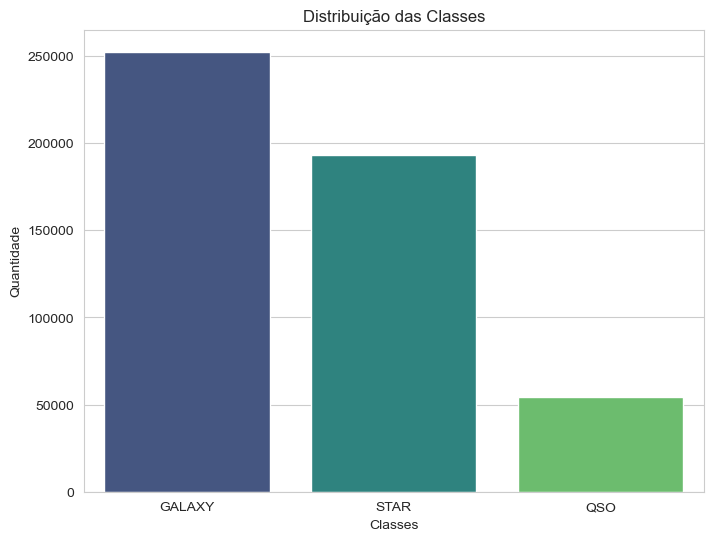


Gerando histogramas para as principais features...


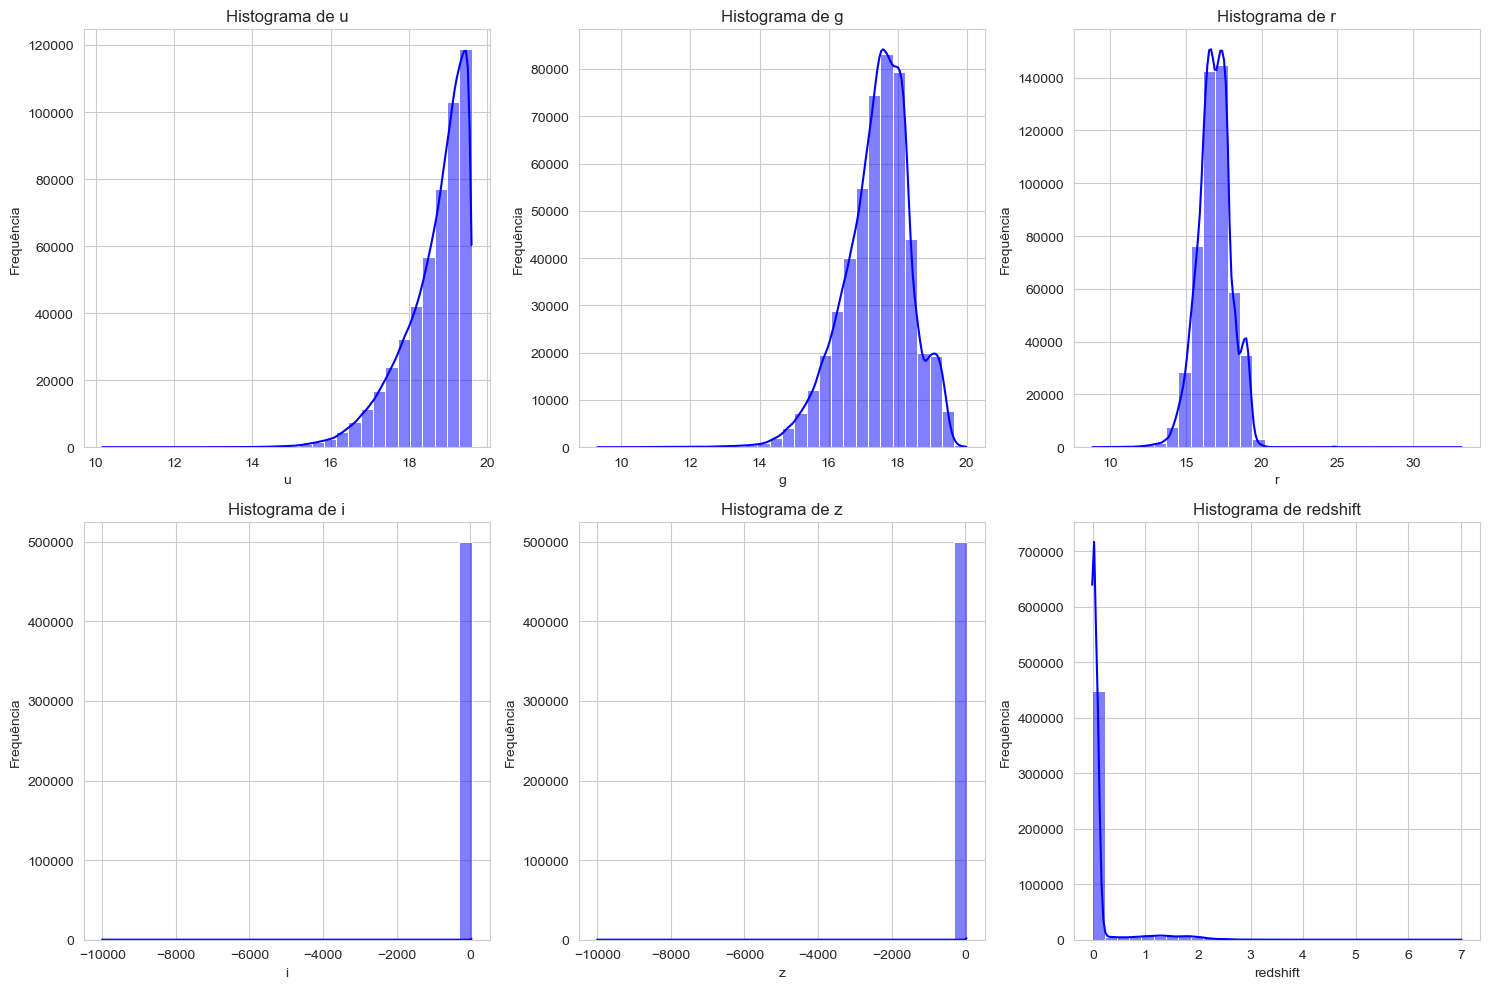

Análise dos dados concluída com sucesso!


In [2]:
# Exibindo informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Exibindo a contagem de valores únicos para a coluna de classificação
print("\nDistribuição das classes (quantidade de estrelas, galáxias e quasares):")
print(df['class'].value_counts())

# Plotando a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index, palette='viridis')
plt.title("Distribuição das Classes")
plt.xlabel("Classes")
plt.ylabel("Quantidade")
plt.show()

# Selecionando algumas features principais para análise (por exemplo, 'u', 'g', 'r', 'i', 'z')
features = ['u', 'g', 'r', 'i', 'z','redshift']

# Substituindo valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Removendo linhas com valores NaN (se necessário)
df.dropna(inplace=True)

# Gerando histogramas para as principais features
print("\nGerando histogramas para as principais features...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Histograma de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

print("Análise dos dados concluída com sucesso!")


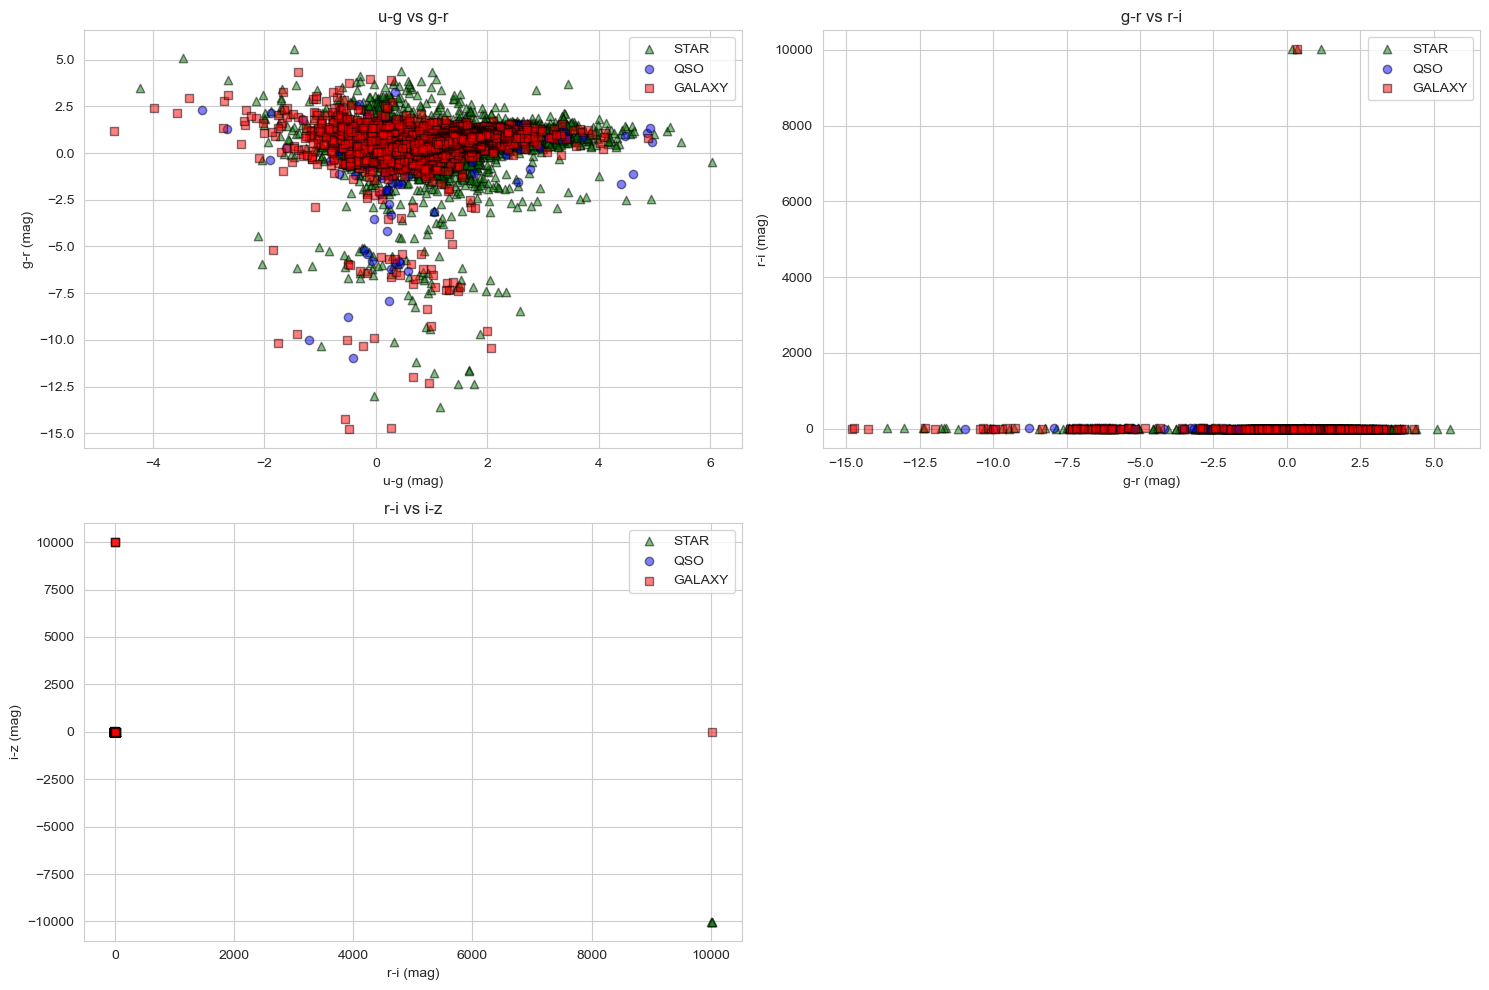

In [3]:
# Filtrando apenas as classes principais: quasares (QSO), estrelas (STAR) e galáxias (GALAXY)
df_filtered = df[df['class'].isin(['QSO', 'STAR', 'GALAXY'])]

# Mapeando as classes para cores e marcadores
class_mapping = {'QSO': 'o', 'STAR': '^', 'GALAXY': 's'}
colors = {'QSO': 'blue', 'STAR': 'green', 'GALAXY': 'red'}

# Criando índices de cores para análise
df_filtered['u-g'] = df_filtered['u'] - df_filtered['g']
df_filtered['g-r'] = df_filtered['g'] - df_filtered['r']
df_filtered['r-i'] = df_filtered['r'] - df_filtered['i']
df_filtered['i-z'] = df_filtered['i'] - df_filtered['z']

# Selecionando as combinações de cores para os gráficos
color_combinations = [
    ('u-g', 'g-r'),
    ('g-r', 'r-i'),
    ('r-i', 'i-z')
]

# Criando gráficos
plt.figure(figsize=(15, 10))
for idx, (x, y) in enumerate(color_combinations, 1):
    plt.subplot(2, 2, idx)
    for obj_class in df_filtered['class'].unique():
        subset = df_filtered[df_filtered['class'] == obj_class]
        plt.scatter(
            subset[x], subset[y], 
            label=obj_class, 
            alpha=0.5, 
            marker=class_mapping[obj_class], 
            color=colors[obj_class], 
            edgecolor='k'
        )
    plt.title(f'{x} vs {y}')
    plt.xlabel(f'{x} (mag)')
    plt.ylabel(f'{y} (mag)')
    plt.legend()

plt.tight_layout()
plt.show()


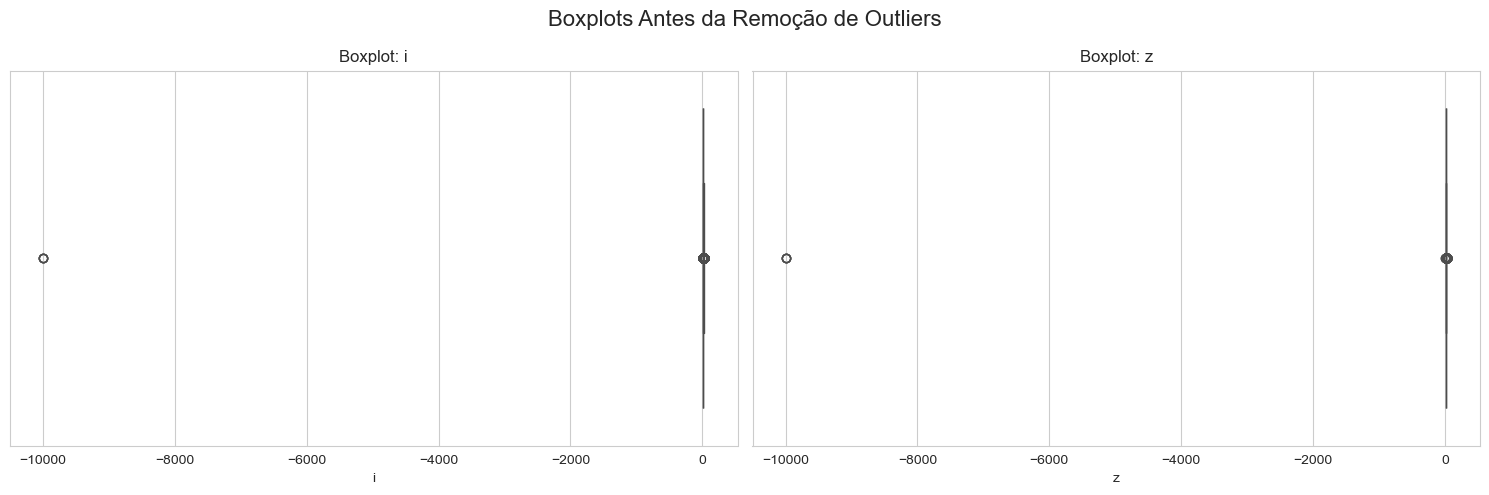


Outliers na feature 'i' usando IQR:
                      objid          ra        dec         u         g  \
26      1237672794496368772    0.879475  -5.190550  19.33843  19.24383   
320     1237666338114240519   14.258540  -0.875188  16.30057  14.25058   
583     1237650795680694379  140.610899  -0.340204  19.58064  17.75082   
633     1237662193446420485  165.817704  39.908261  15.76713  14.10587   
663     1237651312145334318  262.588277  60.882808  19.46392  19.47924   
...                     ...         ...        ...       ...       ...   
499544  1237662237470097429  193.461796   9.709988  14.58502  13.31661   
499554  1237662237481107616  218.928624   8.300601  15.38193  14.19478   
499555  1237662237485564392  229.185365   7.021622  15.71554  13.66061   
499668  1237657769636331671  151.467039  51.475273  19.52651  19.25443   
499817  1237651755086905381  186.493180   3.430271  16.00315  14.12968   

               r         i         z   run  rerun  camcol  field  \
26    

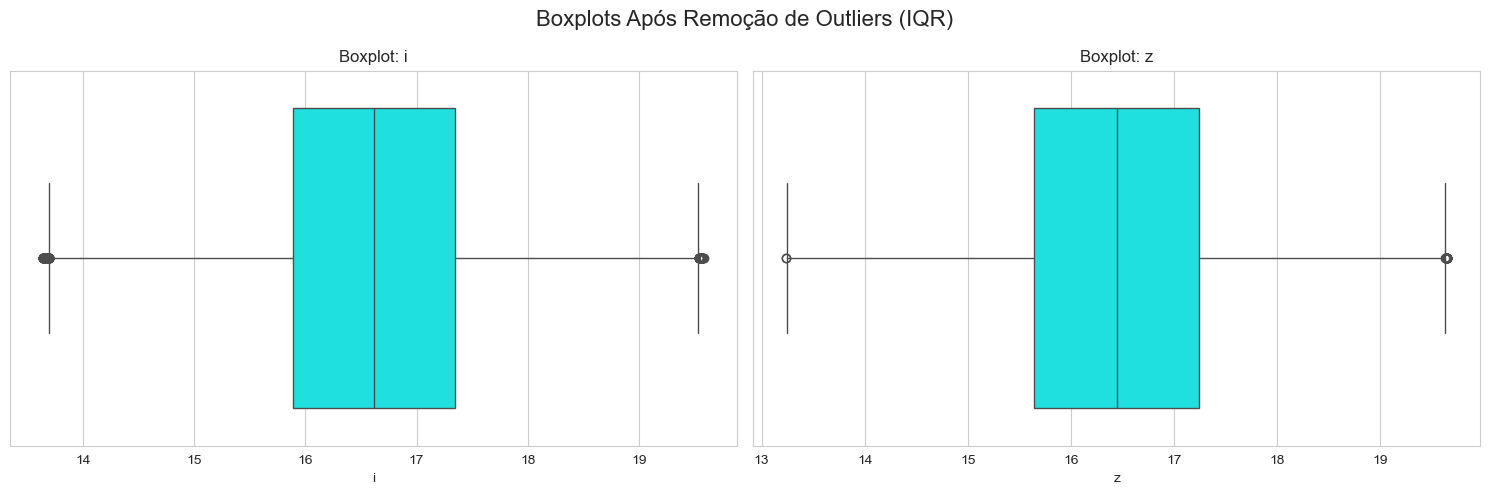


Linhas com outliers usando Z-Score:
Empty DataFrame
Columns: [objid, ra, dec, u, g, r, i, z, run, rerun, camcol, field, specobjid, class, redshift, plate, mjd, fiberid]
Index: []


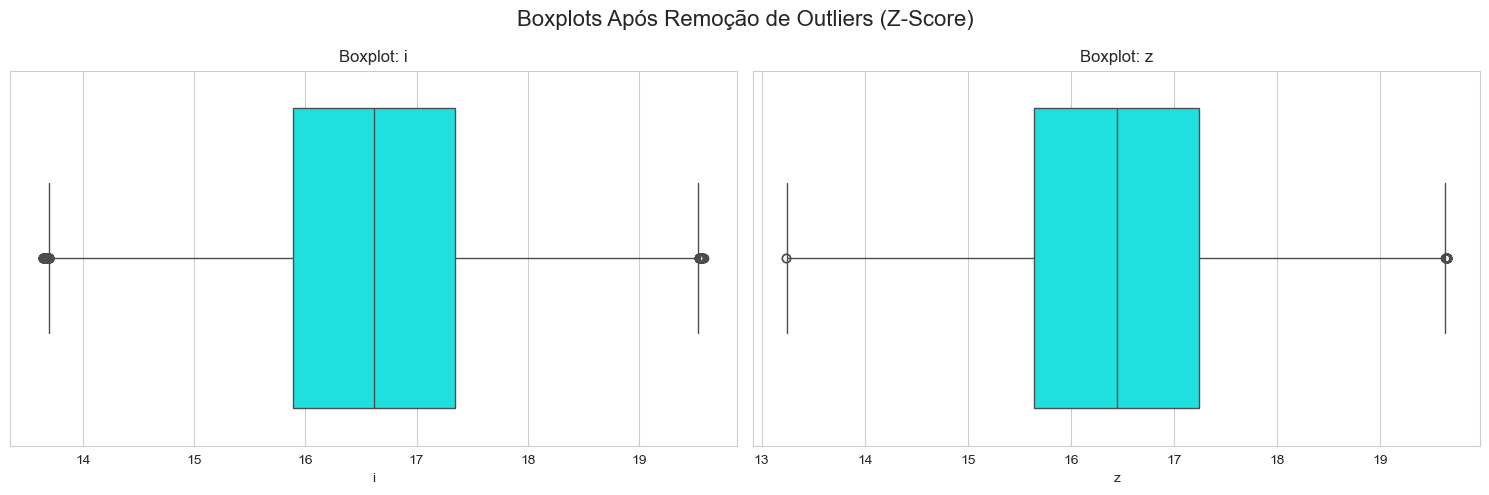


Informações gerais do dataset após remoção de outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 491750 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   objid      491750 non-null  int64  
 1   ra         491750 non-null  float64
 2   dec        491750 non-null  float64
 3   u          491750 non-null  float64
 4   g          491750 non-null  float64
 5   r          491750 non-null  float64
 6   i          491750 non-null  float64
 7   z          491750 non-null  float64
 8   run        491750 non-null  int64  
 9   rerun      491750 non-null  int64  
 10  camcol     491750 non-null  int64  
 11  field      491750 non-null  int64  
 12  specobjid  491750 non-null  uint64 
 13  class      491750 non-null  object 
 14  redshift   491750 non-null  float64
 15  plate      491750 non-null  int64  
 16  mjd        491750 non-null  int64  
 17  fiberid    491750 non-null  int64  
dtypes: float64(8

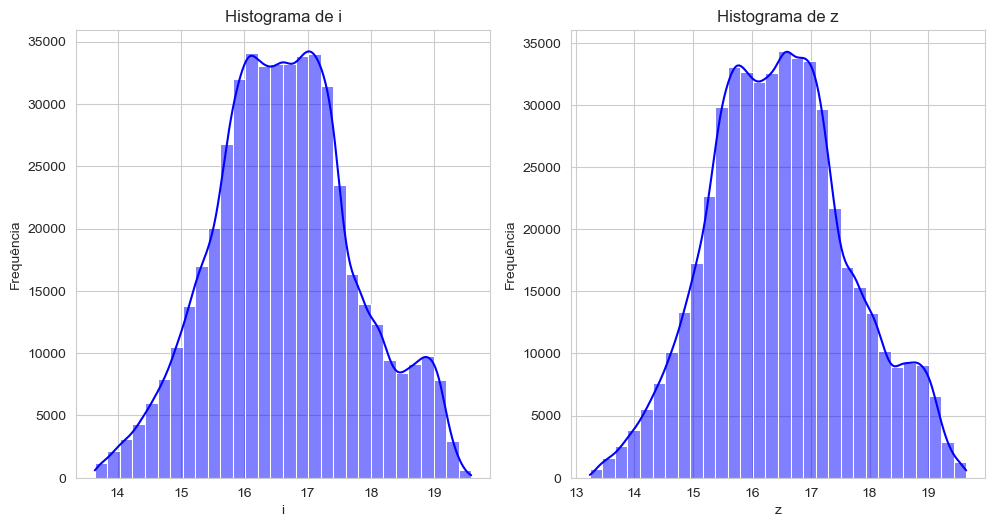

Análise e remoção de outliers concluídas com sucesso!


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Substituindo valores infinitos por NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Removendo linhas com valores NaN
df.dropna(inplace=True)

# Método IQR para remover outliers
def remove_outliers_iqr(df, columns):
    for feature in columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(f"\nOutliers na feature '{feature}' usando IQR:")
        print(df[(df[feature] < lower_bound) | (df[feature] > upper_bound)])

        # Remover os outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Método Z-Score para remover outliers
def remove_outliers_zscore(df, columns, threshold=3.0):
    z_scores = df[columns].apply(zscore)
    outliers = (z_scores.abs() > threshold).any(axis=1)

    print("\nLinhas com outliers usando Z-Score:")
    print(df[outliers])

    # Remover outliers
    df = df[~outliers]
    return df

# Visualizar boxplots antes da remoção
def plot_boxplots(df, columns, title="Boxplots Antes da Remoção de Outliers"):
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        sns.boxplot(data=df, x=feature, color='cyan')
        plt.title(f"Boxplot: {feature}")
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Colunas para análise
columns = ['i', 'z']

# Visualizar boxplots antes da remoção de outliers
plot_boxplots(df, columns, title="Boxplots Antes da Remoção de Outliers")

# Removendo outliers usando IQR
df = remove_outliers_iqr(df, columns)

# Visualizar boxplots após remoção usando IQR
plot_boxplots(df, columns, title="Boxplots Após Remoção de Outliers (IQR)")

# Removendo outliers usando Z-Score (se necessário)
df = remove_outliers_zscore(df, columns)

# Visualizar boxplots após remoção usando Z-Score
plot_boxplots(df, columns, title="Boxplots Após Remoção de Outliers (Z-Score)")

# Verificando informações gerais do dataset após remoção
print("\nInformações gerais do dataset após remoção de outliers:")
print(df.info())

# Gerando histogramas para as principais features
print("\nGerando histogramas para as principais features...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Histograma de {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

print("Análise e remoção de outliers concluídas com sucesso!")


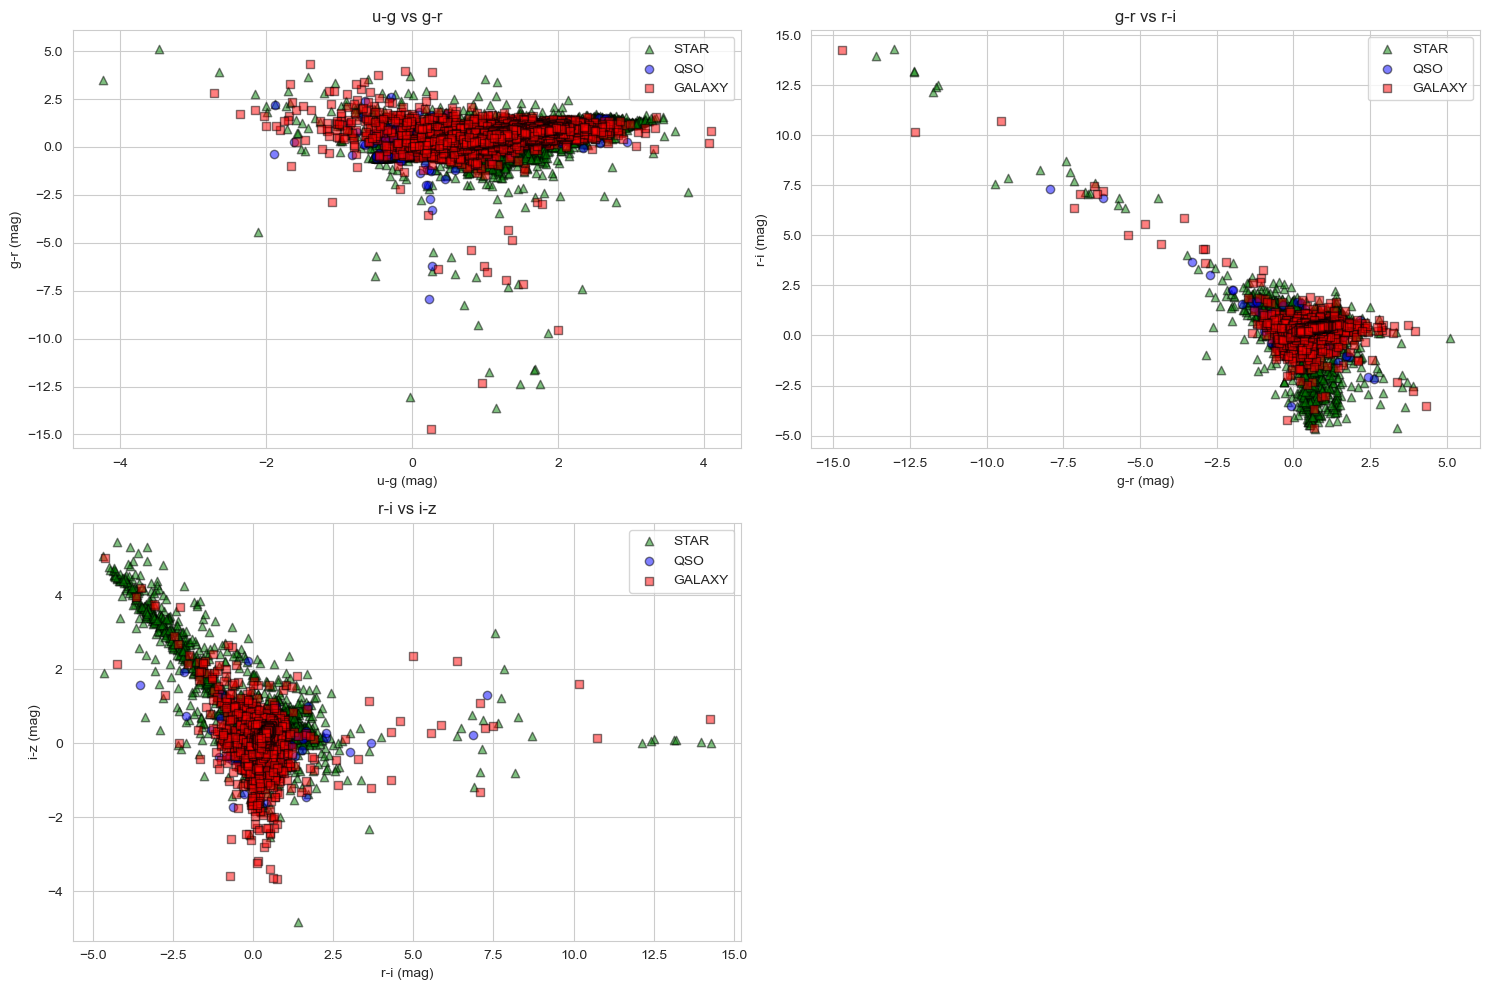

In [5]:
# Filtrando apenas as classes principais: quasares (QSO), estrelas (STAR) e galáxias (GALAXY)
df_filtered = df[df['class'].isin(['QSO', 'STAR', 'GALAXY'])]

# Mapeando as classes para cores e marcadores
class_mapping = {'QSO': 'o', 'STAR': '^', 'GALAXY': 's'}
colors = {'QSO': 'blue', 'STAR': 'green', 'GALAXY': 'red'}

# Criando índices de cores para análise
df_filtered['u-g'] = df_filtered['u'] - df_filtered['g']
df_filtered['g-r'] = df_filtered['g'] - df_filtered['r']
df_filtered['r-i'] = df_filtered['r'] - df_filtered['i']
df_filtered['i-z'] = df_filtered['i'] - df_filtered['z']

# Selecionando as combinações de cores para os gráficos
color_combinations = [
    ('u-g', 'g-r'),
    ('g-r', 'r-i'),
    ('r-i', 'i-z')
]

# Criando gráficos
plt.figure(figsize=(15, 10))
for idx, (x, y) in enumerate(color_combinations, 1):
    plt.subplot(2, 2, idx)
    for obj_class in df_filtered['class'].unique():
        subset = df_filtered[df_filtered['class'] == obj_class]
        plt.scatter(
            subset[x], subset[y], 
            label=obj_class, 
            alpha=0.5, 
            marker=class_mapping[obj_class], 
            color=colors[obj_class], 
            edgecolor='k'
        )
    plt.title(f'{x} vs {y}')
    plt.xlabel(f'{x} (mag)')
    plt.ylabel(f'{y} (mag)')
    plt.legend()

plt.tight_layout()
plt.show()


In [6]:
# 1. Verificando valores nulos ou em branco
print("\nVerificando valores nulos no dataset:")
print(df.isnull().sum())

# Se existirem valores nulos, vamos removê-los
if df.isnull().sum().sum() > 0:
    print("\nExistem valores nulos. Removendo essas linhas...")
    df.dropna(inplace=True)
    print("Valores nulos removidos.")

# 2. Guardando os nomes das colunas
colunas_originais = df.columns.tolist()
print("\nColunas originais guardadas para referência futura.")

# 3. Verificando e mapeando os labels (encoding das classes)
print("\nClasses únicas no dataset:")
print(df['class'].unique())

# Mapear as classes para valores numéricos
class_mapping = {'STAR': 0, 'GALAXY': 1, 'QSO': 2}
df['class'] = df['class'].map(class_mapping)

print("\nClasses mapeadas para valores numéricos:")
print(class_mapping)

# 4. Dropar dados desnecessários (Exemplo: colunas irrelevantes)
# Aqui você pode ajustar conforme o caso (e.g., IDs únicos que não ajudam na classificação)
columns_to_drop = ['objid', 'specobjid']  # Exemplos de colunas desnecessárias
#columns_to_drop = ['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'ra', 'dec']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

print(f"\nColunas desnecessárias removidas: {columns_to_drop}")

# 5. Normalizando os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = df.drop('class', axis=1)  # Excluindo a coluna alvo para normalizar apenas as features
target = df['class']

features_scaled = scaler.fit_transform(features)
print("\nNormalização das features concluída.")

# Atualizando o DataFrame com os dados normalizados
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['class'] = target.values

print("\nDataset preparado com sucesso!")



Verificando valores nulos no dataset:
objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Colunas originais guardadas para referência futura.

Classes únicas no dataset:
['STAR' 'QSO' 'GALAXY']

Classes mapeadas para valores numéricos:
{'STAR': 0, 'GALAXY': 1, 'QSO': 2}

Colunas desnecessárias removidas: ['objid', 'specobjid']

Normalização das features concluída.

Dataset preparado com sucesso!


In [7]:
from sklearn.model_selection import train_test_split

# Separando features (X) e target (y)
X = df_scaled.drop('class', axis=1)
y = df_scaled['class']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Exibindo as dimensões dos conjuntos
print(f"Conjunto de treinamento: {X_train.shape[0]} amostras, {X_train.shape[1]} features")
print(f"Conjunto de teste: {X_test.shape[0]} amostras, {X_test.shape[1]} features")

print("\nSplit de treino e teste realizado com sucesso!")


Conjunto de treinamento: 393400 amostras, 15 features
Conjunto de teste: 98350 amostras, 15 features

Split de treino e teste realizado com sucesso!


In [8]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Listas para armazenar os resultados
resultados_modelos_originais = []
resultados_modelos_otimizados = []
resultados_modelos = []  # Lista padrão para compatibilidade retroativa

# Função genérica para treinar e avaliar modelos
def avaliar_modelo(nome_modelo, modelo, X_train, X_test, y_train, y_test, cv_folds=5, n_jobs=-1, otimizacao=None):
    """
    Avalia um modelo nos dados de treino e teste, incluindo validação cruzada com paralelização.

    Parâmetros:
        nome_modelo (str): Nome do modelo a ser avaliado.
        modelo: Instância do modelo a ser treinado.
        X_train, X_test, y_train, y_test: Dados de treino e teste.
        cv_folds (int): Número de folds para validação cruzada.
        n_jobs (int): Número de CPUs a serem utilizados (-1 para usar todos).
        otimizacao (bool ou None): Se True, salva os resultados em 'resultados_modelos_otimizados'.
                                    Se False, salva em 'resultados_modelos_originais'.
                                    Se None (valor padrão), salva em 'resultados_modelos'.
    """
    print(f"\nTreinando o modelo: {nome_modelo}...")

    # Medindo o tempo de treinamento
    inicio_treino = time.time()
    modelo.fit(X_train, y_train)
    fim_treino = time.time()

    # Fazendo predições
    inicio_pred = time.time()
    y_pred = modelo.predict(X_test)
    fim_pred = time.time()

    # Calculando probabilidades para ROC-AUC (se o modelo suportar)
    try:
        if hasattr(modelo, "predict_proba"):
            y_pred_proba = modelo.predict_proba(X_test)[:, 1] if len(modelo.classes_) <= 2 else modelo.predict_proba(X_test)
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr" if len(modelo.classes_) > 2 else "raise")
        else:
            roc_auc = "N/A"
    except AttributeError:
        roc_auc = "N/A"

    # Calculando métricas
    acuracia = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='weighted') * 100

    # Validação cruzada com paralelização
    try:
        cross_val_scores = cross_val_score(modelo, X_train, y_train, cv=cv_folds, scoring='accuracy', n_jobs=n_jobs)
        cross_val_mean = cross_val_scores.mean() * 100
        cross_val_std = cross_val_scores.std() * 100
    except Exception as e:
        print(f"Erro ao realizar validação cruzada para {nome_modelo}: {e}")
        cross_val_mean, cross_val_std = "N/A", "N/A"

    # Calculando matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Montando o resultado
    resultado = {
        "Modelo": nome_modelo,
        "Acurácia (%)": round(acuracia, 2),
        "F1-Score (%)": round(f1, 2),
        "ROC-AUC (%)": round(roc_auc, 2) if roc_auc != "N/A" else "N/A",
        "Tempo de Treinamento (s)": round(fim_treino - inicio_treino, 2),
        "Tempo de Predição (s)": round(fim_pred - inicio_pred, 2),
        "Validação Cruzada - Média (%)": round(cross_val_mean, 2) if cross_val_mean != "N/A" else "N/A",
        "Validação Cruzada - Stdev (%)": round(cross_val_std, 2) if cross_val_std != "N/A" else "N/A",
        "Matriz Confusão": cm,
        "Predições": y_pred,
        "Reais": y_test,
        "Classes": modelo.classes_ if hasattr(modelo, "classes_") else None
    }

    # Salvando resultados na lista correta
    if otimizacao is True:
        resultados_modelos_otimizados.append(resultado)
    elif otimizacao is False:
        resultados_modelos_originais.append(resultado)
    else:
        resultados_modelos.append(resultado)  # Compatibilidade retroativa

    # Exibindo os resultados principais
    print(f"Modelo {nome_modelo} avaliado com sucesso!")
    print(f"Acurácia: {acuracia:.2f}%, F1-Score: {f1:.2f}%, ROC-AUC: {roc_auc if roc_auc != 'N/A' else 'N/A'}\n")
    if cross_val_mean != "N/A":
        print(f"Validação Cruzada - Média: {cross_val_mean:.2f}%, Desvio Padrão: {cross_val_std:.2f}%\n")

    # Matriz de Confusão Percentual
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=modelo.classes_, yticklabels=modelo.classes_)
    plt.title(f"Matriz de Confusão (Percentual) - {nome_modelo}")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()



Treinando o modelo: Decision Tree...
Modelo Decision Tree avaliado com sucesso!
Acurácia: 98.70%, F1-Score: 98.70%, ROC-AUC: 0.986709704342673

Validação Cruzada - Média: 98.63%, Desvio Padrão: 0.03%



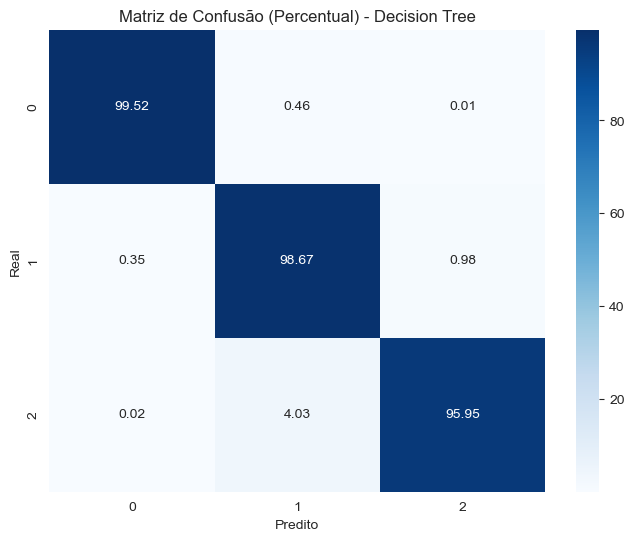

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Inicializando o modelo Decision Tree
modelo_dt = DecisionTreeClassifier(random_state=1)

# Avaliando o modelo
avaliar_modelo("Decision Tree", modelo_dt, X_train, X_test, y_train, y_test)



Treinando o modelo: Random Forest...
Modelo Random Forest avaliado com sucesso!
Acurácia: 99.06%, F1-Score: 99.06%, ROC-AUC: 0.9981135297730989

Validação Cruzada - Média: 99.00%, Desvio Padrão: 0.03%



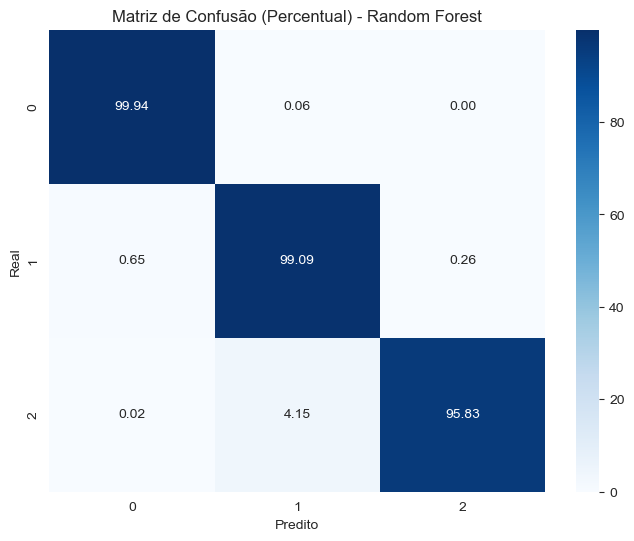

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Inicializando o modelo Random Forest
modelo_rf = RandomForestClassifier(random_state=1, n_estimators=100, n_jobs=4)

# Avaliando o modelo
avaliar_modelo("Random Forest", modelo_rf, X_train, X_test, y_train, y_test)



Treinando o modelo: Gradient Boosting...
Modelo Gradient Boosting avaliado com sucesso!
Acurácia: 99.11%, F1-Score: 99.11%, ROC-AUC: 0.9982286900380797

Validação Cruzada - Média: 99.10%, Desvio Padrão: 0.03%



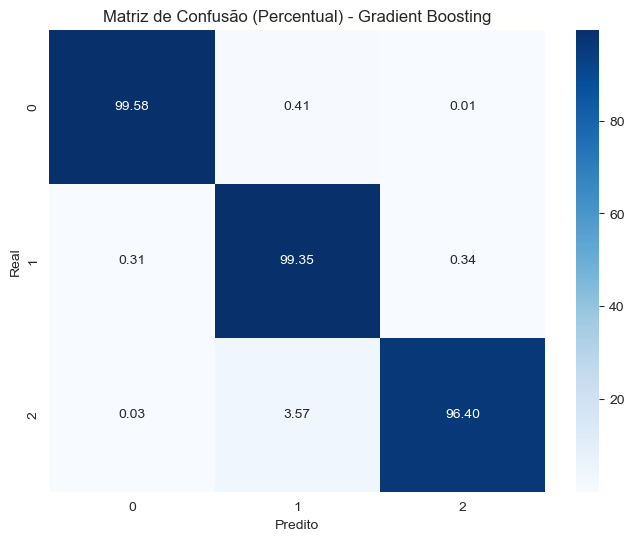

In [11]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Inicializando o modelo Gradient Boosting
modelo_gb = HistGradientBoostingClassifier(random_state=1,  learning_rate=0.1)

# Avaliando o modelo
avaliar_modelo("Gradient Boosting", modelo_gb, X_train, X_test, y_train, y_test)



Treinando o modelo: Logistic Regression...
Modelo Logistic Regression avaliado com sucesso!
Acurácia: 95.13%, F1-Score: 95.14%, ROC-AUC: 0.9867760731034014

Validação Cruzada - Média: 94.75%, Desvio Padrão: 0.11%



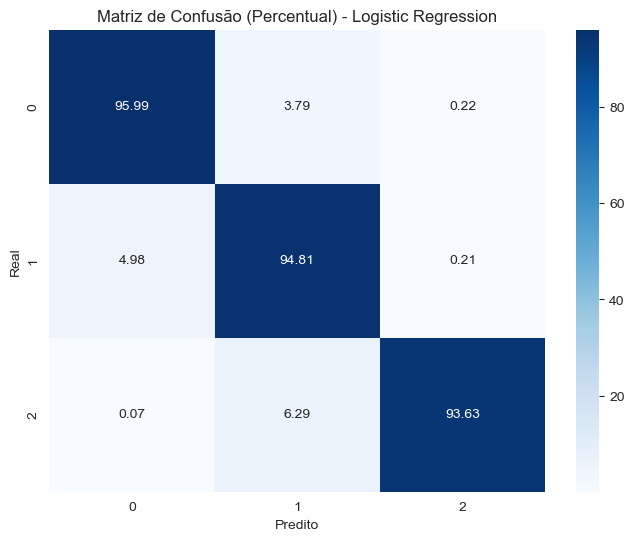

In [12]:
from sklearn.linear_model import LogisticRegression

# Inicializando o modelo Logistic Regression
modelo_lr = LogisticRegression(random_state=1, max_iter=1000)

# Avaliando o modelo
avaliar_modelo("Logistic Regression", modelo_lr, X_train, X_test, y_train, y_test)



Treinando o modelo: Naive Bayes...
Modelo Naive Bayes avaliado com sucesso!
Acurácia: 97.86%, F1-Score: 97.86%, ROC-AUC: 0.9873265547502784

Validação Cruzada - Média: 97.77%, Desvio Padrão: 0.06%



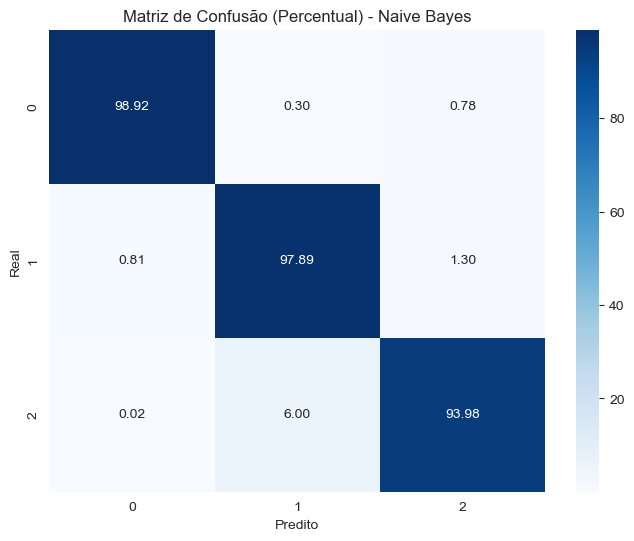

In [13]:
from sklearn.naive_bayes import GaussianNB

# Inicializando o modelo Naive Bayes (Gaussian)
modelo_nb = GaussianNB()

# Avaliando o modelo
avaliar_modelo("Naive Bayes", modelo_nb, X_train, X_test, y_train, y_test)



Treinando o modelo: Rede Neural Rasa (MLP)...
Modelo Rede Neural Rasa (MLP) avaliado com sucesso!
Acurácia: 98.92%, F1-Score: 98.92%, ROC-AUC: 0.9978497482517131

Validação Cruzada - Média: 98.86%, Desvio Padrão: 0.07%



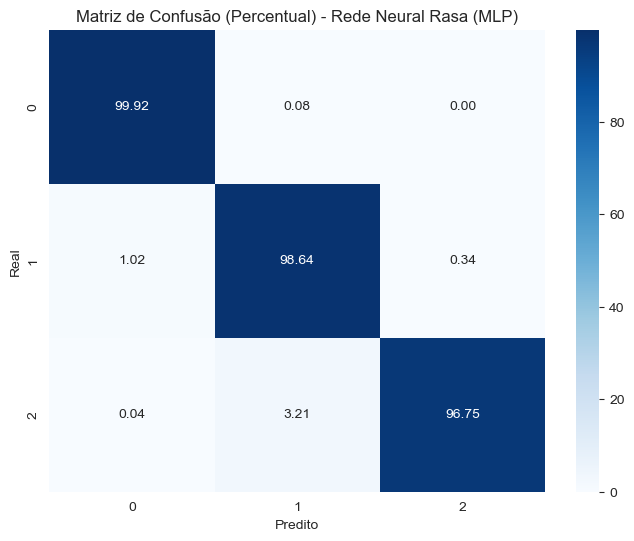

In [14]:
from sklearn.neural_network import MLPClassifier

# Inicializando o modelo MLPClassifier
modelo_mlp = MLPClassifier(hidden_layer_sizes=(60,), max_iter=300, random_state=1)

# Avaliando o modelo
avaliar_modelo("Rede Neural Rasa (MLP)", modelo_mlp, X_train, X_test, y_train, y_test)


### Extra



Treinando o modelo: Support Vector Machine (Linear SVC)...


/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Modelo Support Vector Machine (Linear SVC) avaliado com sucesso!
Acurácia: 97.50%, F1-Score: 97.48%, ROC-AUC: N/A

Validação Cruzada - Média: 97.40%, Desvio Padrão: 0.08%



/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


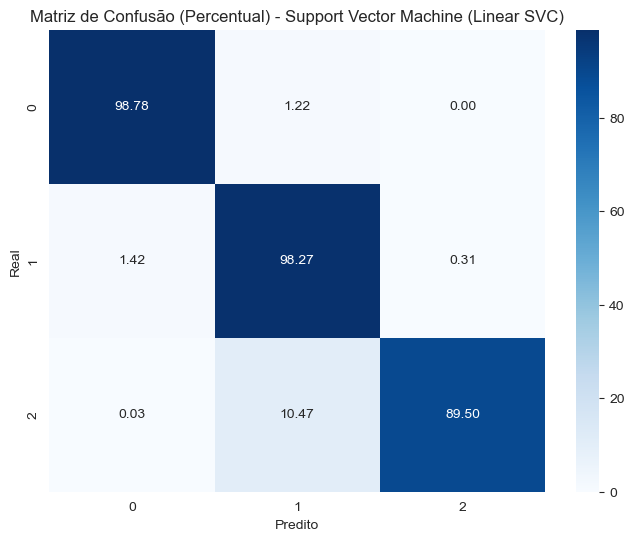

In [15]:
# from sklearn.svm import SVC

# Inicializando o modelo SVM
# modelo_svm = SVC(kernel='rbf', random_state=1)

# Avaliando o modelo
# avaliar_modelo(False,"Support Vector Machine (SVM)", modelo_svm, X_train, X_test, y_train, y_test)

from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Criando o pipeline com StandardScaler e LinearSVC
modelo_svm = Pipeline([
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('svc', LinearSVC(random_state=1, max_iter=1000)) # Modelo LinearSVC
])

# Avaliando o modelo
avaliar_modelo("Support Vector Machine (Linear SVC)", modelo_svm, X_train, X_test, y_train, y_test)



Treinando o modelo: Extra Trees Classifier...
Modelo Extra Trees Classifier avaliado com sucesso!
Acurácia: 98.61%, F1-Score: 98.61%, ROC-AUC: 0.9961886256126561

Validação Cruzada - Média: 98.55%, Desvio Padrão: 0.04%



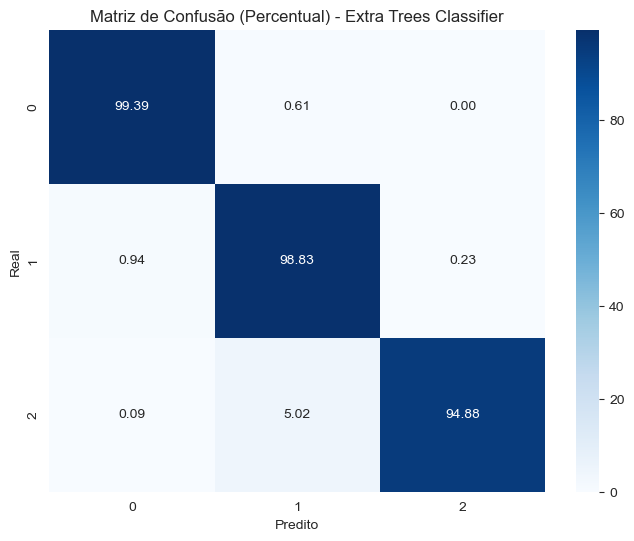

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

# Inicializando o modelo Extra Trees
modelo_et = ExtraTreesClassifier(random_state=1,n_jobs=4)

# Avaliando o modelo
avaliar_modelo("Extra Trees Classifier", modelo_et, X_train, X_test, y_train, y_test)



Treinando o modelo: Stochastic Gradient Descent (SGD)...
Modelo Stochastic Gradient Descent (SGD) avaliado com sucesso!
Acurácia: 88.34%, F1-Score: 88.35%, ROC-AUC: N/A

Validação Cruzada - Média: 88.31%, Desvio Padrão: 0.24%



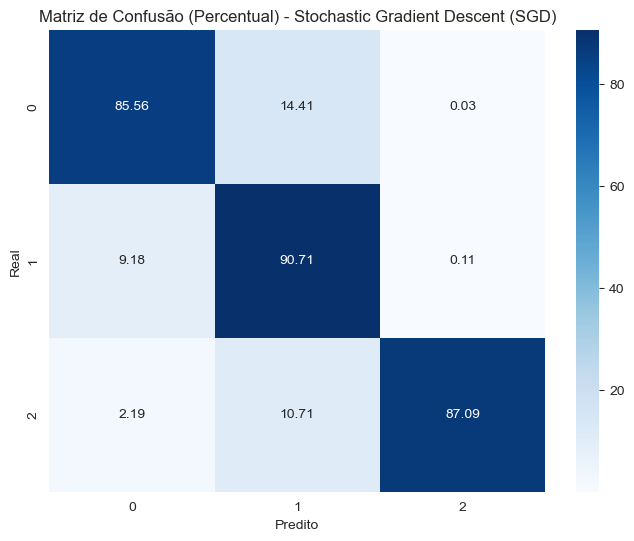

In [17]:
from sklearn.linear_model import SGDClassifier

# Inicializando o modelo SGDClassifier
modelo_sgd = SGDClassifier(loss='hinge', random_state=1,n_jobs=4)

# Avaliando o modelo
avaliar_modelo("Stochastic Gradient Descent (SGD)", modelo_sgd, X_train, X_test, y_train, y_test)



Treinando o modelo: K-Nearest Neighbors (KNN)...
Modelo K-Nearest Neighbors (KNN) avaliado com sucesso!
Acurácia: 91.27%, F1-Score: 91.22%, ROC-AUC: 0.9597352062107212

Validação Cruzada - Média: 90.82%, Desvio Padrão: 0.15%



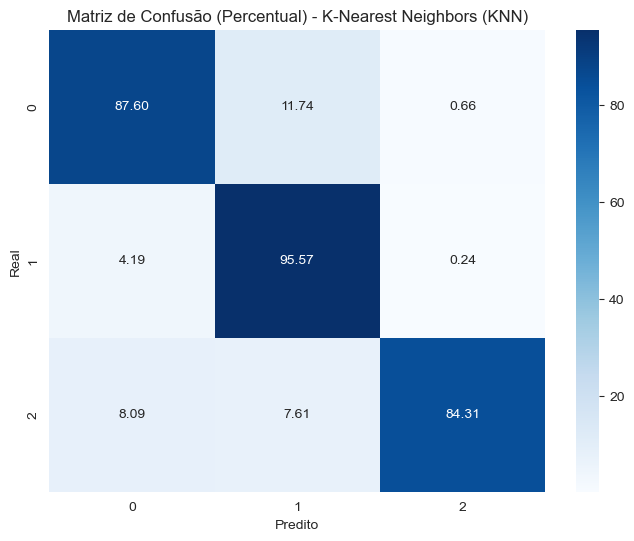

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializando o modelo KNN
modelo_knn = KNeighborsClassifier(n_neighbors=5,n_jobs=4)

# Avaliando o modelo
avaliar_modelo("K-Nearest Neighbors (KNN)", modelo_knn, X_train, X_test, y_train, y_test)



Treinando o modelo: AdaBoost Classifier...
Modelo AdaBoost Classifier avaliado com sucesso!
Acurácia: 94.01%, F1-Score: 93.53%, ROC-AUC: 0.9299594708668355

Validação Cruzada - Média: 91.62%, Desvio Padrão: 1.45%



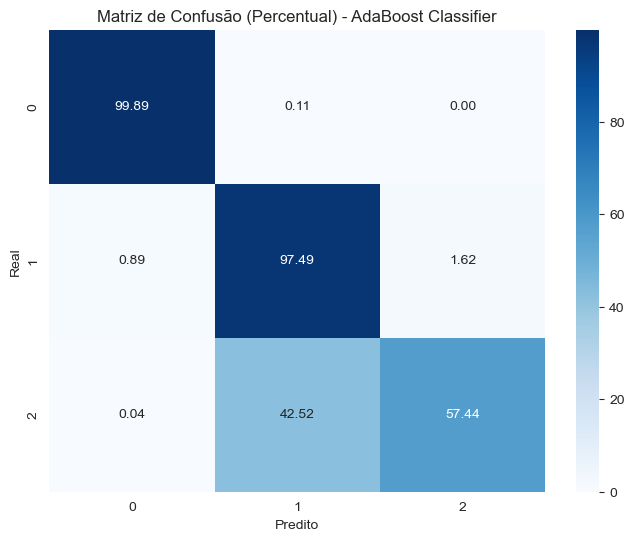

In [19]:
from sklearn.ensemble import AdaBoostClassifier

# Inicializando o modelo AdaBoost
modelo_ab = AdaBoostClassifier(random_state=1, n_estimators=50)

# Avaliando o modelo
avaliar_modelo("AdaBoost Classifier", modelo_ab, X_train, X_test, y_train, y_test)



Tabela de Métricas de Desempenho:


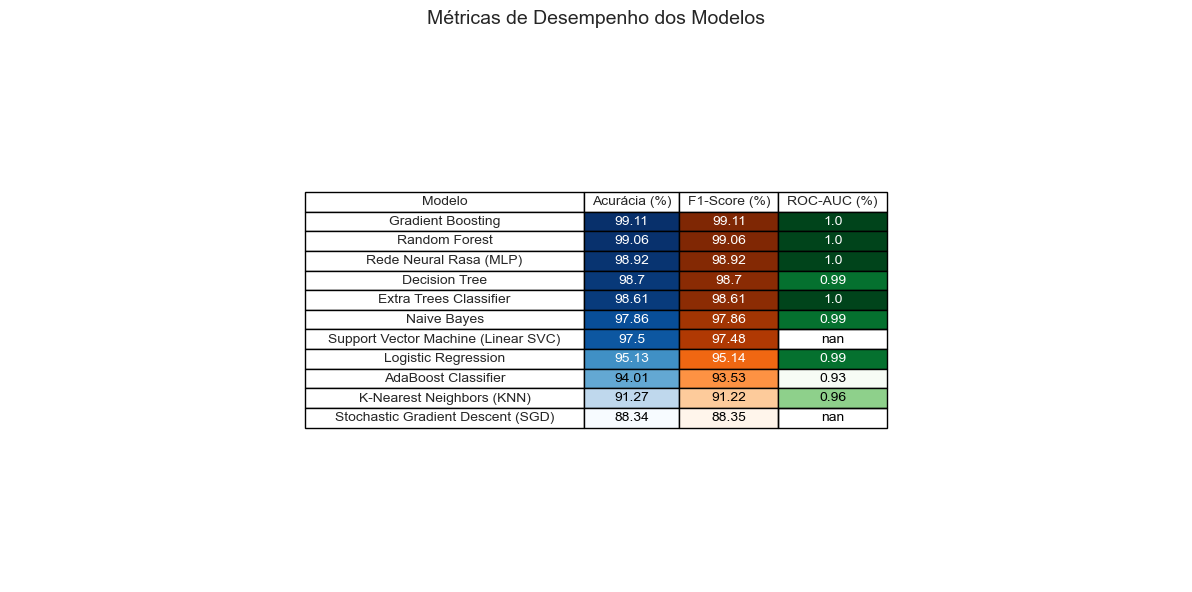


Tabela de Tempos e Validação Cruzada:


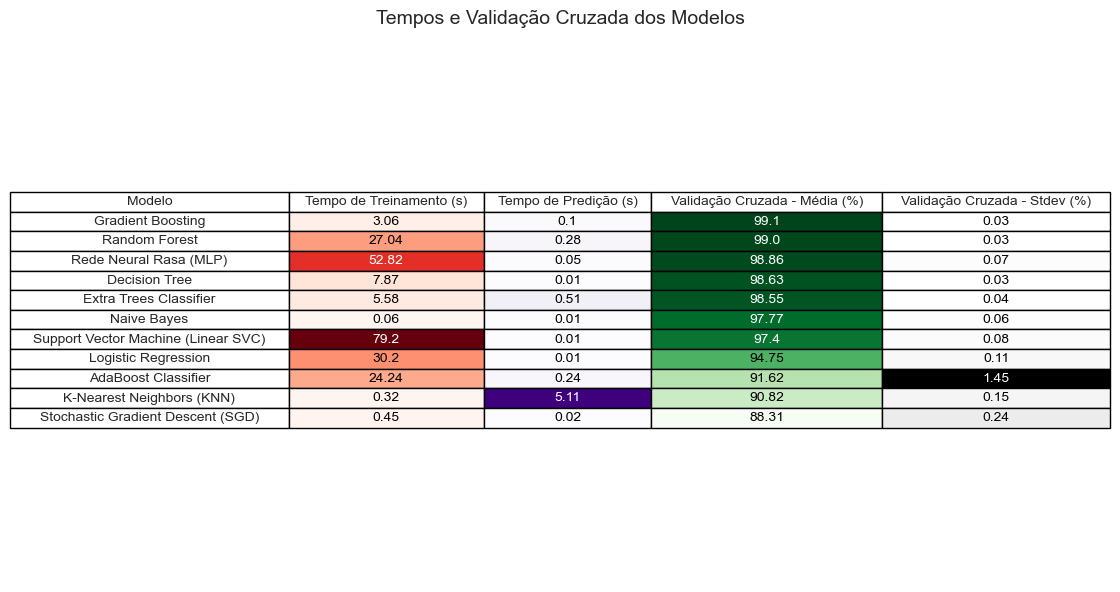

/var/folders/j3/8xpww1wd6fqcdvm22t0542rc0000gn/T/ipykernel_33300/4117867796.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Acurácia (%)", y="Modelo", data=resultados_df, palette="Blues_d")


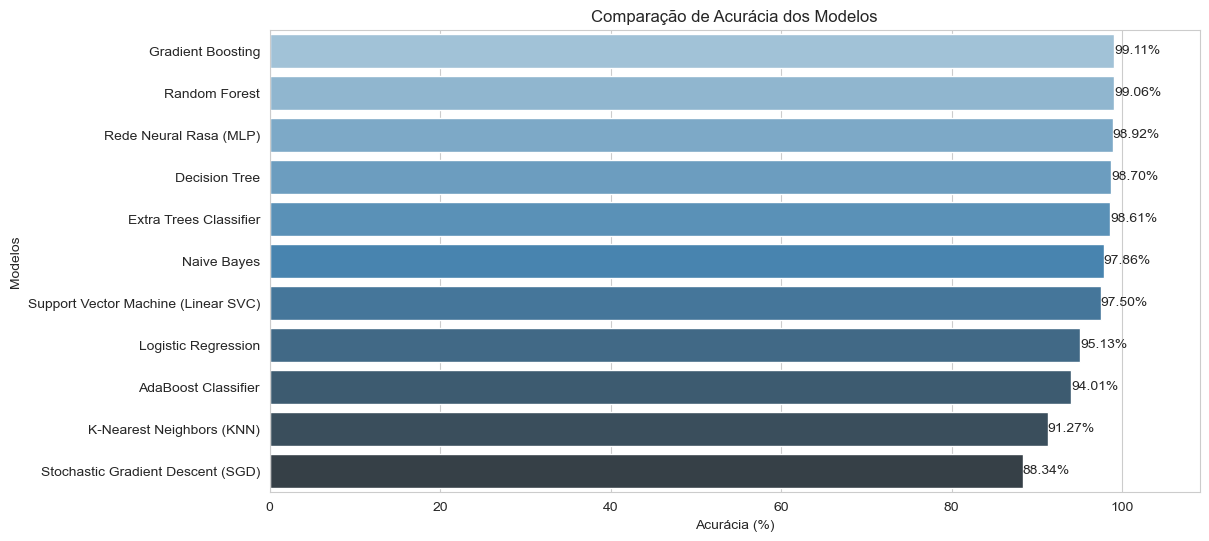

/var/folders/j3/8xpww1wd6fqcdvm22t0542rc0000gn/T/ipykernel_33300/4117867796.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="F1-Score (%)", y="Modelo", data=resultados_df, palette="Oranges_d")


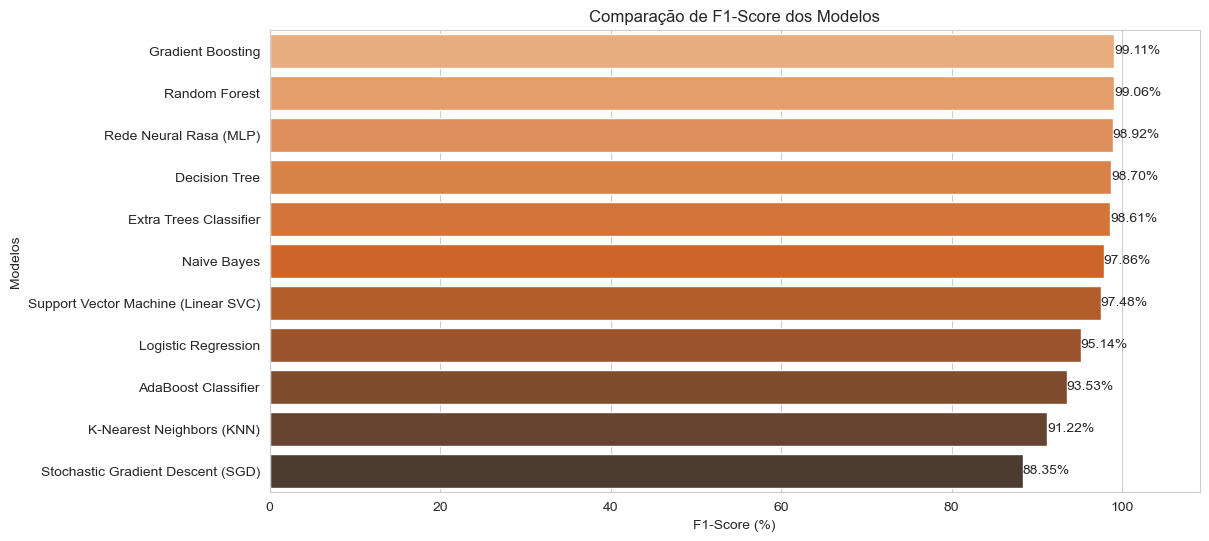

/var/folders/j3/8xpww1wd6fqcdvm22t0542rc0000gn/T/ipykernel_33300/4117867796.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tempo de Treinamento (s)", y="Modelo", data=resultados_df, palette="Greens_d")


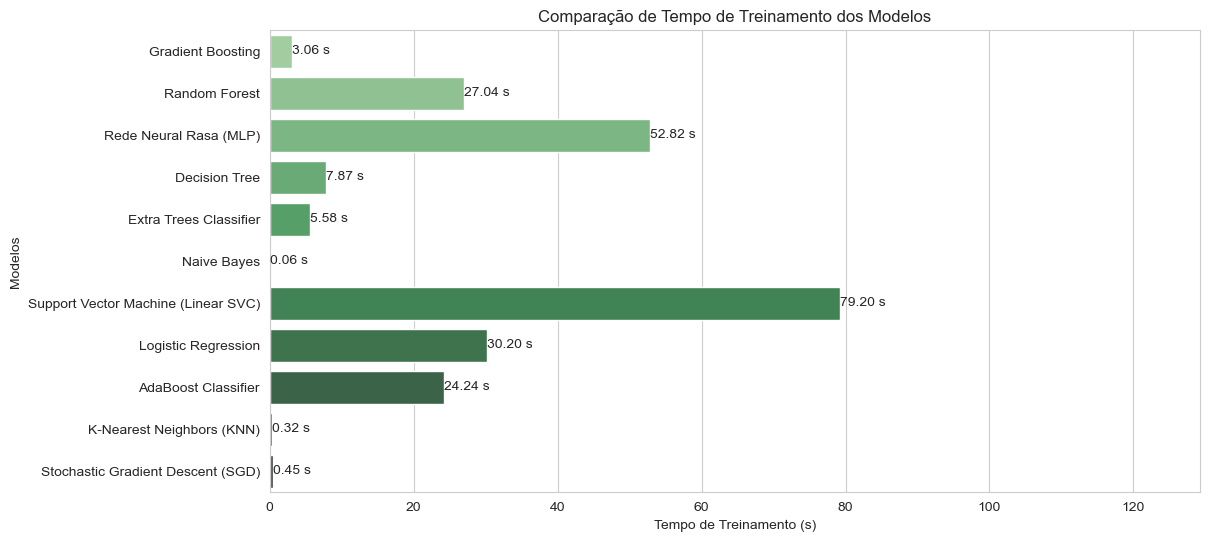

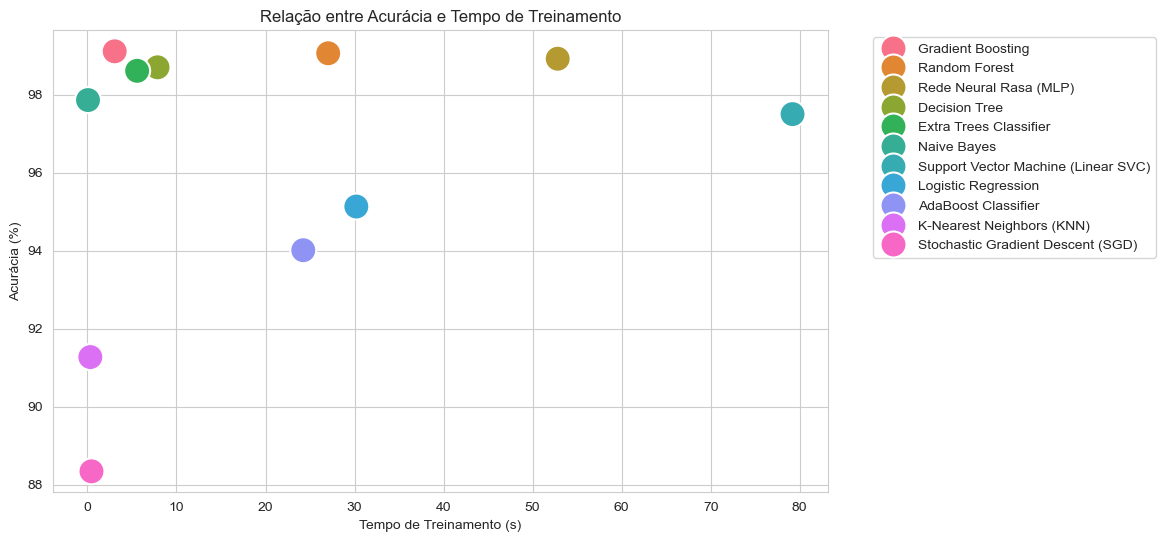

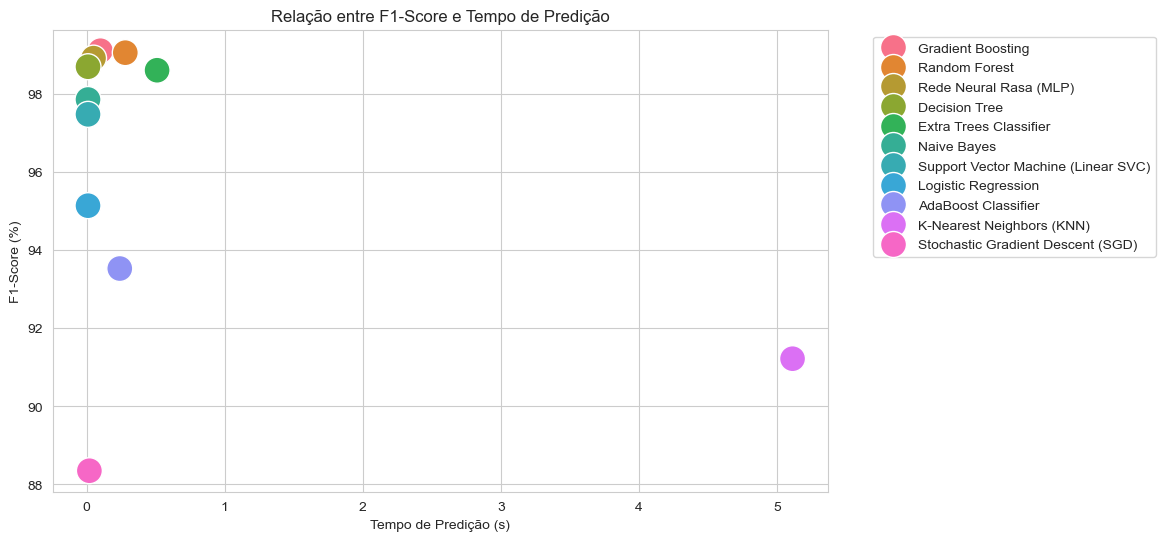

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consolidando os resultados em um DataFrame
resultados_df = pd.DataFrame(resultados_modelos)

# Ordenando os resultados pela Acurácia
resultados_df.sort_values(by="Acurácia (%)", ascending=False, inplace=True)

# Convertendo colunas numéricas para o formato correto
cols_to_convert = ["Acurácia (%)", "F1-Score (%)", "ROC-AUC (%)", "Tempo de Treinamento (s)", "Tempo de Predição (s)", "Validação Cruzada - Média (%)", "Validação Cruzada - Stdev (%)"]
for col in cols_to_convert:
    resultados_df[col] = pd.to_numeric(resultados_df[col], errors='coerce')

# Dividindo os dados para melhorar a visualização
heatmap_data_metrics = resultados_df[["Modelo", "Acurácia (%)", "F1-Score (%)", "ROC-AUC (%)"]]
heatmap_data_times = resultados_df[["Modelo", "Tempo de Treinamento (s)", "Tempo de Predição (s)", "Validação Cruzada - Média (%)", "Validação Cruzada - Stdev (%)"]]

# Função para criar tabela visual
def plot_table(data, title, col_palettes):
    # Cálculo do range para cada coluna
    col_ranges = {
        col: (data[col].min(), data[col].max())
        for col in data.columns if data[col].dtype in [float, int]
    }
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('off')  # Remover os eixos

    # Adicionando a tabela ao gráfico
    table = ax.table(
        cellText=data.values,
        colLabels=data.columns,
        loc='center',
        cellLoc='center',
        colLoc='center'
    )

    # Ajustando estilo da tabela
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(data.columns))))

    # Aplicando gradiente para cada célula numérica
    for (row, col), cell in table._cells.items():
        if row > 0 and col > 0:  # Apenas células de métricas (não incluir "Modelo")
            column_name = data.columns[col]
            if column_name in col_ranges:  # Garantir que é uma métrica numérica
                value = data.iloc[row - 1, col]
                min_val, max_val = col_ranges[column_name]
                normalized_value = (value - min_val) / (max_val - min_val) if max_val > min_val else 0.5
                cell_color = col_palettes.get(column_name, plt.cm.Blues)(normalized_value)

                # Aplicar cor de fundo e ajustar cor da fonte
                cell.set_facecolor(cell_color)
                text_color = "white" if normalized_value > 0.6 else "black"
                cell.get_text().set_color(text_color)
        else:
            cell.set_facecolor('white')  # Fundo branco para cabeçalhos

    plt.title(title, fontsize=14, pad=10)
    plt.tight_layout(pad=1)
    plt.show()

# Definindo paletas de cores específicas para cada métrica
col_palettes_metrics = {
    "Acurácia (%)": plt.cm.Blues,
    "F1-Score (%)": plt.cm.Oranges,
    "ROC-AUC (%)": plt.cm.Greens,
}

col_palettes_times = {
    "Tempo de Treinamento (s)": plt.cm.Reds,
    "Tempo de Predição (s)": plt.cm.Purples,
    "Validação Cruzada - Média (%)": plt.cm.Greens,
    "Validação Cruzada - Stdev (%)": plt.cm.Greys,
}

# Plotando as tabelas
print("\nTabela de Métricas de Desempenho:")
plot_table(heatmap_data_metrics, "Métricas de Desempenho dos Modelos", col_palettes_metrics)

print("\nTabela de Tempos e Validação Cruzada:")
plot_table(heatmap_data_times, "Tempos e Validação Cruzada dos Modelos", col_palettes_times)



# Gráfico 1: Comparação de Acurácia
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Acurácia (%)", y="Modelo", data=resultados_df, palette="Blues_d")
plt.title("Comparação de Acurácia dos Modelos")
plt.xlabel("Acurácia (%)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["Acurácia (%)"].max() + 10)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")
plt.show()

# Gráfico 2: Comparação de F1-Score
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="F1-Score (%)", y="Modelo", data=resultados_df, palette="Oranges_d")
plt.title("Comparação de F1-Score dos Modelos")
plt.xlabel("F1-Score (%)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["F1-Score (%)"].max() + 10)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")
plt.show()

# Gráfico 3: Comparação de Tempo de Treinamento
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Tempo de Treinamento (s)", y="Modelo", data=resultados_df, palette="Greens_d")
plt.title("Comparação de Tempo de Treinamento dos Modelos")
plt.xlabel("Tempo de Treinamento (s)")
plt.ylabel("Modelos")
plt.xlim(0, resultados_df["Tempo de Treinamento (s)"].max() + 50)

# Adicionando os valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f s")
plt.show()

# Gerar um dicionário de cores único baseado nos modelos
palette = sns.color_palette("husl", n_colors=len(resultados_df["Modelo"]))
model_colors = dict(zip(resultados_df["Modelo"], palette))

# Gráfico 4: Scatter Plot de Acurácia vs. Tempo de Treinamento
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Tempo de Treinamento (s)", y="Acurácia (%)", hue="Modelo", data=resultados_df, palette=model_colors, s=350)
plt.title("Relação entre Acurácia e Tempo de Treinamento")
plt.xlabel("Tempo de Treinamento (s)")
plt.ylabel("Acurácia (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Gráfico 5: Scatter Plot de F1-Score vs. Tempo de Predição
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Tempo de Predição (s)", y="F1-Score (%)", hue="Modelo", data=resultados_df, palette=model_colors, s=350, edgecolor='w', linewidth=1)  
plt.title("Relação entre F1-Score e Tempo de Predição")
plt.xlabel("Tempo de Predição (s)")
plt.ylabel("F1-Score (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


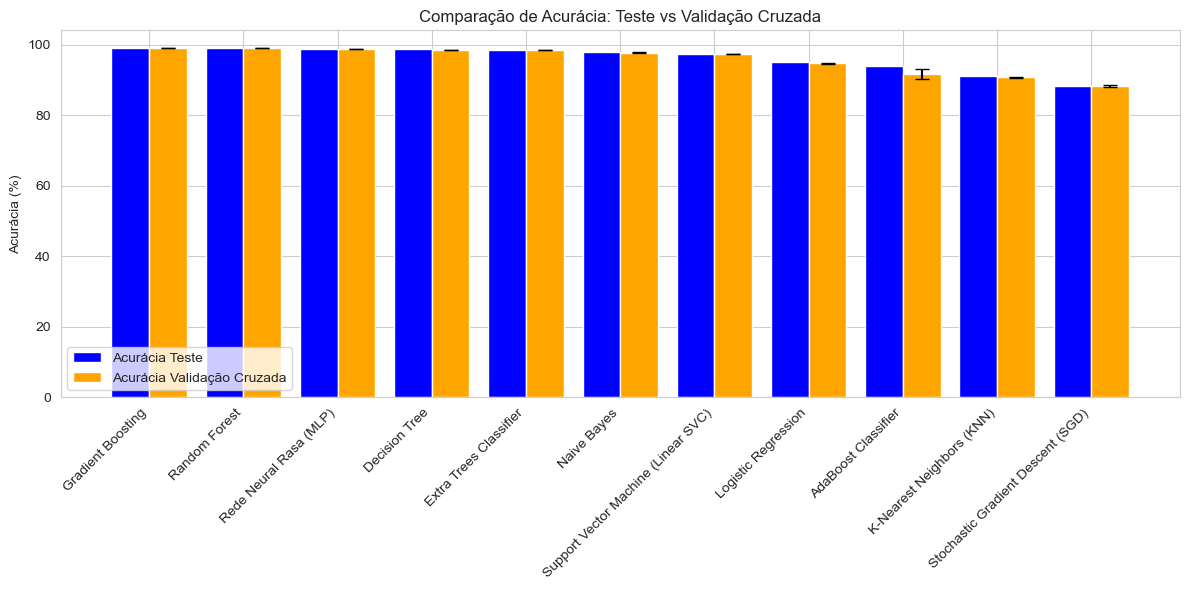

In [21]:
# Ordenando os modelos por Acurácia Teste
resultados_df = resultados_df.sort_values(by="Acurácia (%)", ascending=False)

# Dados atualizados
modelos = resultados_df["Modelo"]
acc_test = resultados_df["Acurácia (%)"]
acc_val_mean = resultados_df["Validação Cruzada - Média (%)"]
acc_val_std = resultados_df["Validação Cruzada - Stdev (%)"]

x = np.arange(len(modelos))  # Posição dos modelos
width = 0.4  # Largura das barras

fig, ax = plt.subplots(figsize=(12, 6))

# Barras de teste
ax.bar(x - width/2, acc_test, width, label="Acurácia Teste", color="blue")

# Barras de validação cruzada
ax.bar(x + width/2, acc_val_mean, width, yerr=acc_val_std, label="Acurácia Validação Cruzada", color="orange", capsize=5)

# Adicionando valores nas barras
""" 
for i, v in enumerate(acc_test):
    ax.text(i - 0.5, v + 0.5, f"{v:.1f}%", color="blue", ha="center", fontsize=10)

for i, v in enumerate(acc_val_mean):
    ax.text(i + 0.5, v + 0.5, f"{v:.1f}%", color="orange", ha="center", fontsize=10)
"""

# Personalização do gráfico
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=45, ha="right")
ax.set_ylabel("Acurácia (%)")
ax.set_title("Comparação de Acurácia: Teste vs Validação Cruzada")
ax.legend()

plt.tight_layout()
plt.show()


Heatmap de Erros por Classe e Modelo:


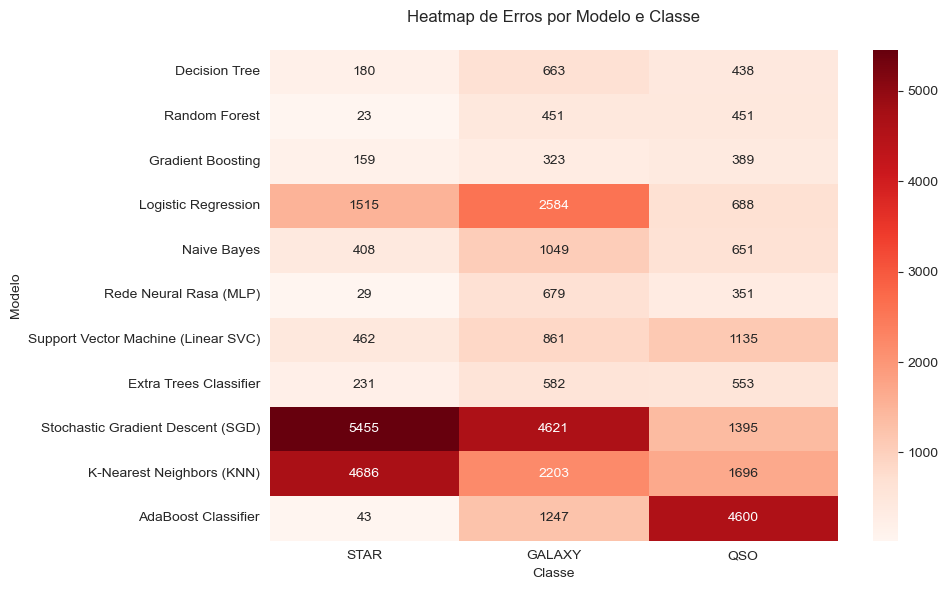


Gráficos de Barras para Cada Classe:


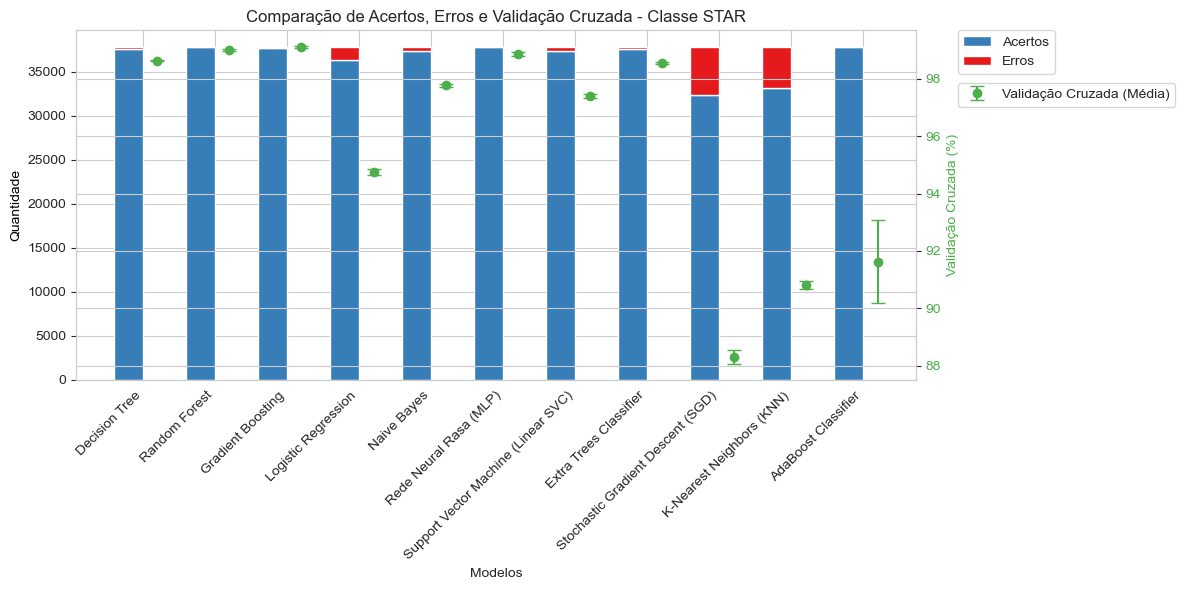

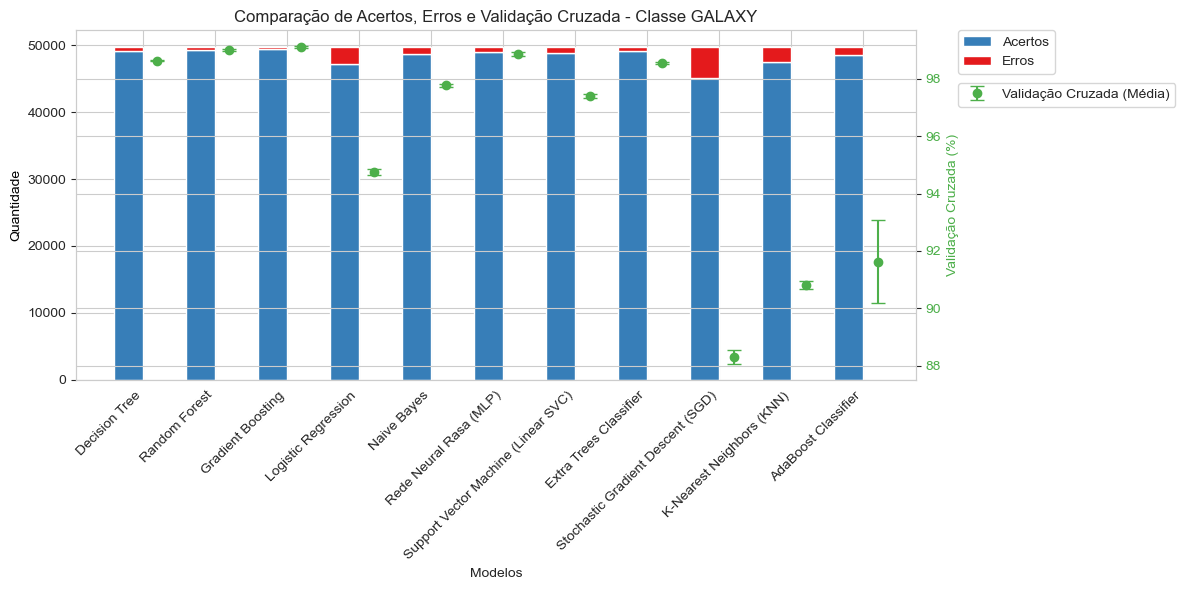

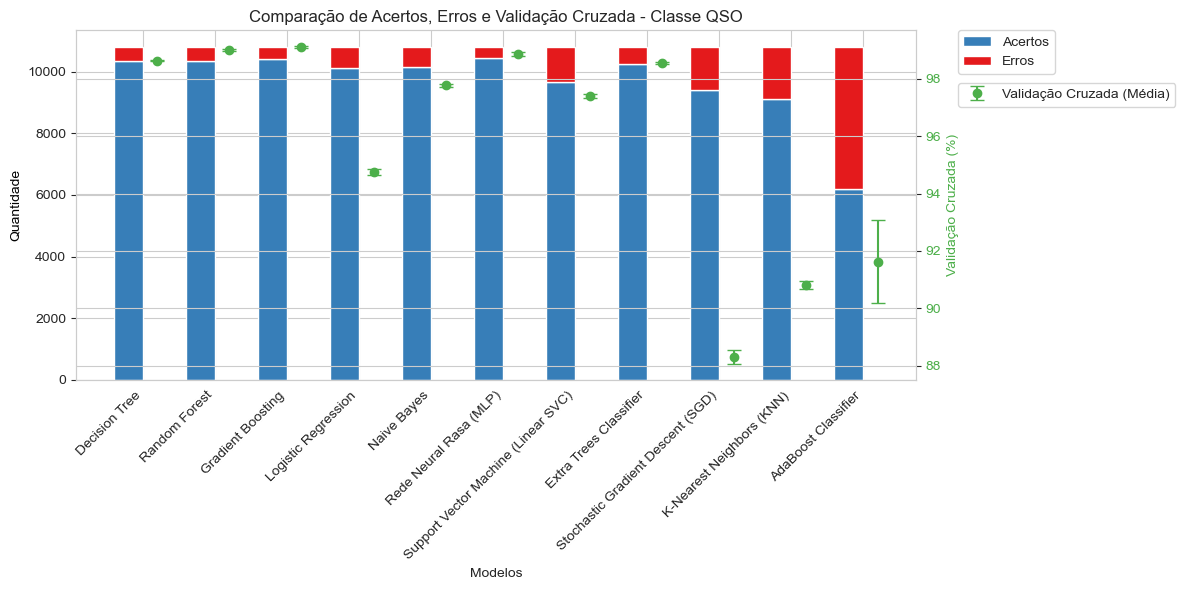


Curvas de Métricas para Cada Classe:


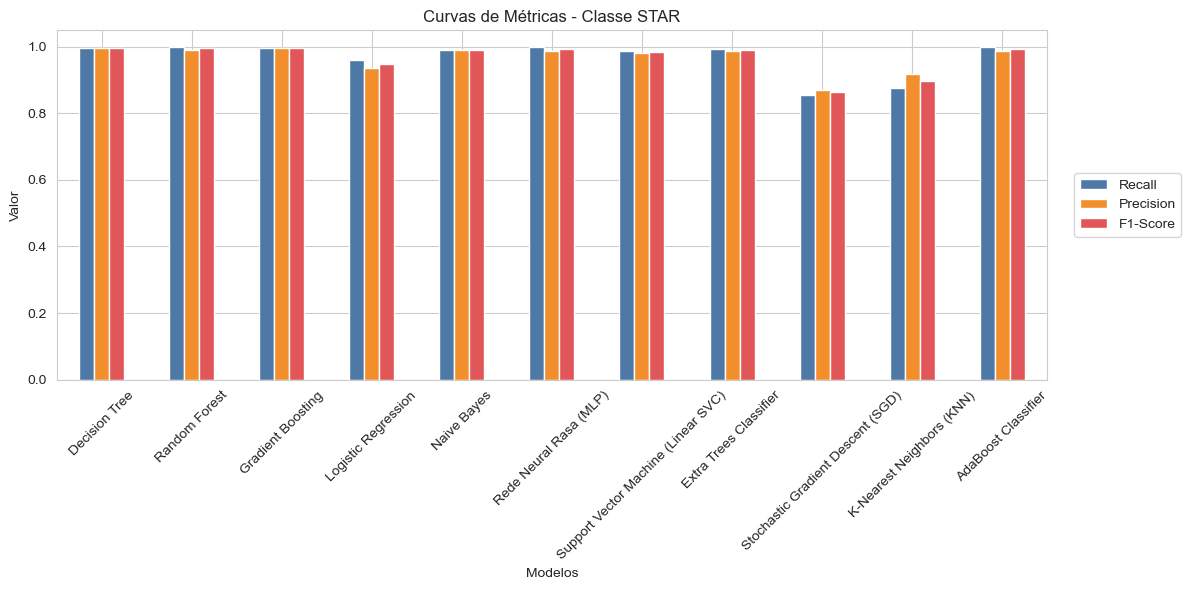

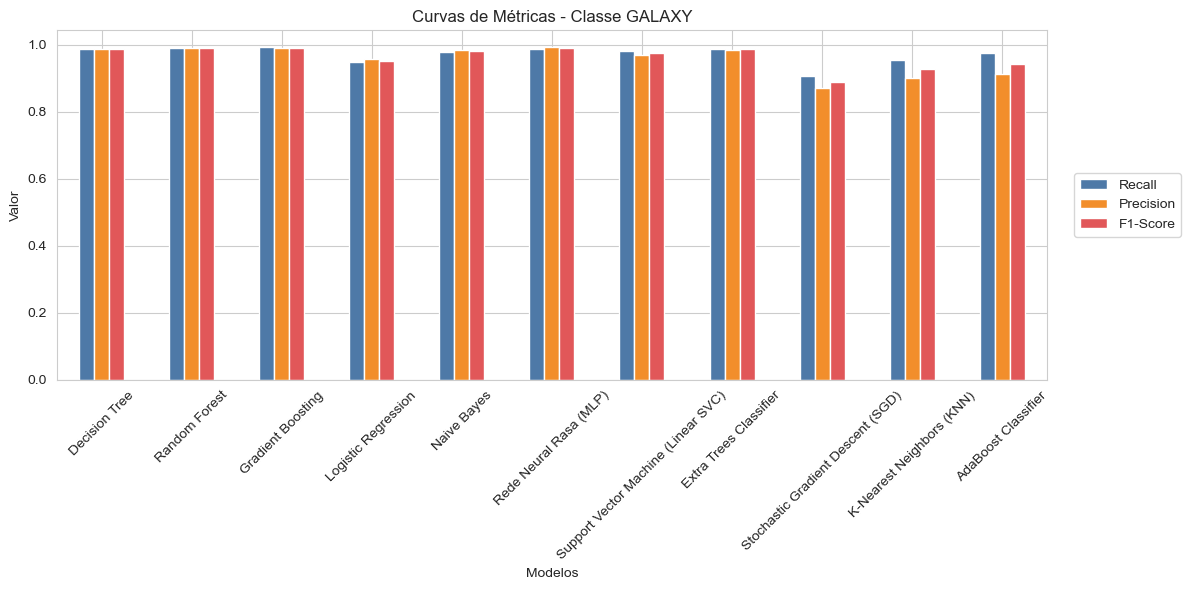

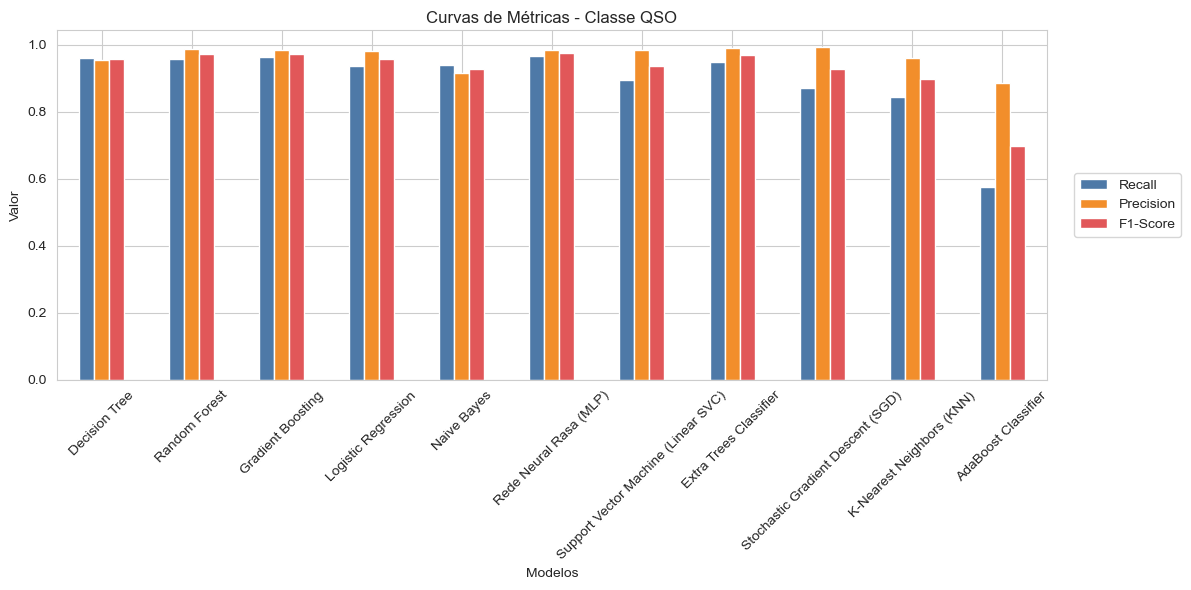

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, precision_score, f1_score

# Decodificando as classes
class_mapping = {0: 'STAR', 1: 'GALAXY', 2: 'QSO'}
class_names = list(class_mapping.values())

# 1. Heatmap de Erros por Classe e Modelo
def plot_heatmap(resultados_modelos):
    num_classes = len(class_names)
    erros_por_modelo = []

    for modelo in resultados_modelos:
        cm = modelo["Matriz Confusão"]
        erros = [sum(cm[classe]) - cm[classe][classe] for classe in range(num_classes)]
        erros_por_modelo.append(erros)

    erros_df = pd.DataFrame(erros_por_modelo, columns=class_names)
    erros_df["Modelo"] = [modelo["Modelo"] for modelo in resultados_modelos]
    erros_df.set_index("Modelo", inplace=True)

    # Plotando o Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(erros_df, annot=True, fmt="d", cmap="Reds", xticklabels=class_names, yticklabels=erros_df.index)
    plt.title("Heatmap de Erros por Modelo e Classe", pad=20)
    plt.xlabel("Classe")
    plt.ylabel("Modelo")

    plt.tight_layout()
    plt.show()


# 2. Gráfico de Barras para Acertos, Erros e Validação Cruzada de Cada Classe
def plot_barras(resultados_modelos, classe_idx):
    # Verificando se a classe existe no mapeamento
    classe_name = class_mapping.get(classe_idx)
    if not classe_name:
        raise ValueError(f"Classe índice {classe_idx} não encontrada no mapeamento {class_mapping}.")

    resultados_classe = []

    for modelo in resultados_modelos:
        cm = modelo["Matriz Confusão"]
        acertos = cm[classe_idx][classe_idx]
        erros = sum(cm[classe_idx]) - acertos
        acc_val_mean = modelo.get("Validação Cruzada - Média (%)", 0)
        acc_val_std = modelo.get("Validação Cruzada - Stdev (%)", 0)
        resultados_classe.append({
            "Modelo": modelo["Modelo"],
            "Acertos": acertos,
            "Erros": erros,
            "Validação Cruzada - Média (%)": acc_val_mean,
            "Validação Cruzada - Stdev (%)": acc_val_std
        })

    resultados_classe_df = pd.DataFrame(resultados_classe)
    resultados_classe_df.set_index("Modelo", inplace=True)
    
    # Gráfico de Barras com dois eixos Y
    fig, ax1 = plt.subplots(figsize=(12, 6))
    bar_width = 0.4  # Largura das barras
    modelos = resultados_classe_df.index
    x = np.arange(len(modelos))

    # Eixo para Acertos e Erros
    ax1.bar(x - bar_width / 2, resultados_classe_df["Acertos"], width=bar_width, label="Acertos", color="#377eb8")
    ax1.bar(x - bar_width / 2, resultados_classe_df["Erros"], bottom=resultados_classe_df["Acertos"], width=bar_width, label="Erros", color="#e41a1c")
    ax1.set_ylabel("Quantidade", color="black")
    ax1.set_xlabel("Modelos")
    ax1.set_xticks(x)
    ax1.set_xticklabels(modelos, rotation=45, ha="right")
    ax1.set_title(f"Comparação de Acertos, Erros e Validação Cruzada - Classe {classe_name}")

    # Segundo eixo Y para Validação Cruzada
    ax2 = ax1.twinx()
    ax2.errorbar(x + bar_width / 2, resultados_classe_df["Validação Cruzada - Média (%)"], 
                 yerr=resultados_classe_df["Validação Cruzada - Stdev (%)"], 
                 fmt='o', color="#4daf4a", label="Validação Cruzada (Média)", capsize=5)
    ax2.set_ylabel("Validação Cruzada (%)", color="#4daf4a")
    ax2.tick_params(axis='y', labelcolor="#4daf4a")

    # Ajustando as legendas
    ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.85), borderaxespad=0.)

    plt.tight_layout()
    plt.show()


# 3. Curvas de Métricas para Cada Classe
def plot_curvas_metricas(resultados_modelos, classe_idx):
    classe_name = class_mapping.get(classe_idx)
    if not classe_name:
        raise ValueError(f"Classe índice {classe_idx} não encontrada no mapeamento {class_mapping}.")

    recalls, precisions, f1_scores = [], [], []

    for modelo in resultados_modelos:
        y_pred = modelo["Predições"]
        y_test = modelo["Reais"]

        recall = recall_score(y_test, y_pred, labels=[classe_idx], average=None)[0]
        precision = precision_score(y_test, y_pred, labels=[classe_idx], average=None)[0]
        f1 = f1_score(y_test, y_pred, labels=[classe_idx], average=None)[0]

        recalls.append(recall)
        precisions.append(precision)
        f1_scores.append(f1)

    metricas_df = pd.DataFrame({
        "Modelo": [modelo["Modelo"] for modelo in resultados_modelos],
        "Recall": recalls,
        "Precision": precisions,
        "F1-Score": f1_scores
    })
    metricas_df.set_index("Modelo", inplace=True)

    # Gráfico de Barras
    fig, ax = plt.subplots(figsize=(12, 6))
    metricas_df.plot(kind="bar", ax=ax, color=["#4E79A7", "#F28E2B", "#E15759"])
    ax.set_title(f"Curvas de Métricas - Classe {classe_name}")
    ax.set_xlabel("Modelos")
    ax.set_ylabel("Valor")
    ax.set_xticklabels(metricas_df.index, rotation=45)

    # Ajustando a legenda para o lado direito, em formato de lista
    ax.legend(["Recall", "Precision", "F1-Score"], loc="center left", bbox_to_anchor=(1.02, 0.5))

    plt.tight_layout()
    plt.show()


# Chamando as funções
print("Heatmap de Erros por Classe e Modelo:")
plot_heatmap(resultados_modelos)

print("\nGráficos de Barras para Cada Classe:")
for classe_idx in range(len(class_mapping)):  # Para as classes STAR (0), GALAXY (1), QSO (2)
    plot_barras(resultados_modelos, classe_idx)

print("\nCurvas de Métricas para Cada Classe:")
for classe_idx in range(len(class_mapping)):  # Para as classes STAR (0), GALAXY (1), QSO (2)
    plot_curvas_metricas(resultados_modelos, classe_idx)


In [23]:
# Lista dos 4 melhores modelos selecionados (alterar conforme necessário)
melhores_modelos = [
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "Extra Trees Classifier",
    "Rede Neural Rasa (MLP)"
]

# Copiar os resultados dos modelos selecionados para resultados_modelos_originais
for resultado in resultados_modelos:
    if resultado["Modelo"] in melhores_modelos:
        resultados_modelos_originais.append(resultado)

# Confirmação
print(f"{len(resultados_modelos_originais)} modelos salvos em resultados_modelos_originais.")


5 modelos salvos em resultados_modelos_originais.



Treinando o modelo: Random Forest (Otimizado)...
Modelo Random Forest (Otimizado) avaliado com sucesso!
Acurácia: 99.05%, F1-Score: 99.05%, ROC-AUC: 0.9985771662368318

Validação Cruzada - Média: 98.98%, Desvio Padrão: 0.03%



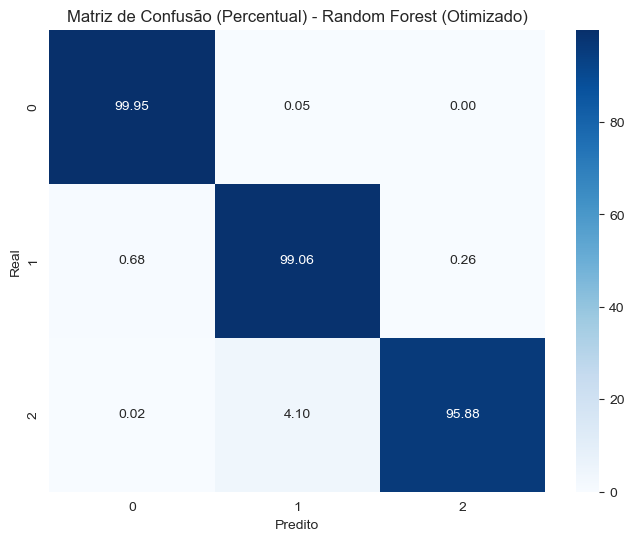


Treinando o modelo: Gradient Boosting (Otimizado)...
Modelo Gradient Boosting (Otimizado) avaliado com sucesso!
Acurácia: 99.12%, F1-Score: 99.11%, ROC-AUC: 0.9983945286182992

Validação Cruzada - Média: 99.05%, Desvio Padrão: 0.03%



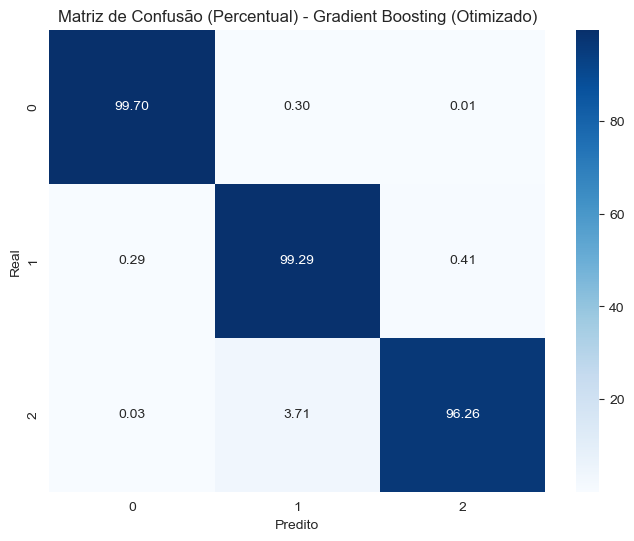


Treinando o modelo: Rede Neural Rasa (MLP) (Otimizado)...


/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/MBA_USP_TCC/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/

Modelo Rede Neural Rasa (MLP) (Otimizado) avaliado com sucesso!
Acurácia: 99.05%, F1-Score: 99.04%, ROC-AUC: 0.9980214825087487

Validação Cruzada - Média: 98.96%, Desvio Padrão: 0.05%



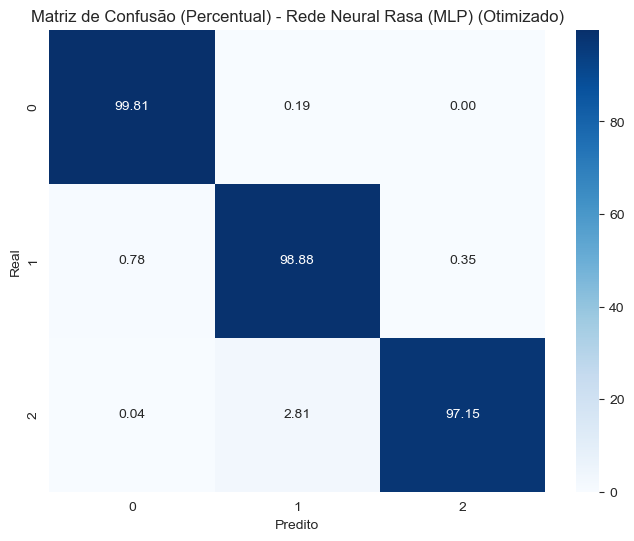


Treinando o modelo: Extra Trees Classifier (Otimizado)...
Modelo Extra Trees Classifier (Otimizado) avaliado com sucesso!
Acurácia: 97.85%, F1-Score: 97.85%, ROC-AUC: 0.9956407231791281

Validação Cruzada - Média: 97.86%, Desvio Padrão: 0.03%



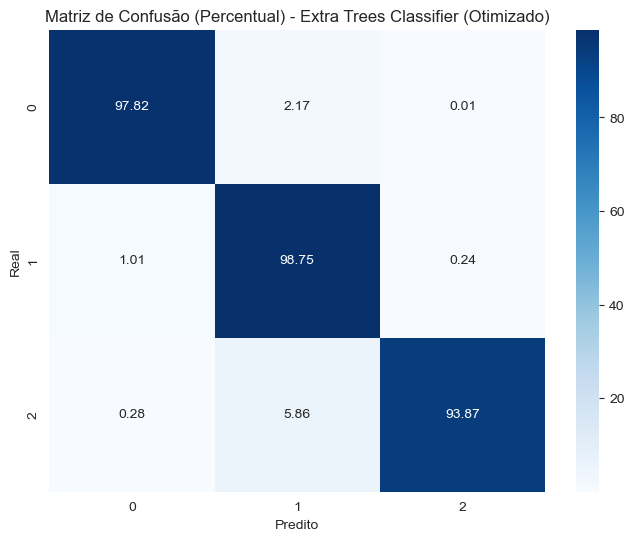


Treinando o modelo: Decision Tree (Otimizado)...
Modelo Decision Tree (Otimizado) avaliado com sucesso!
Acurácia: 98.92%, F1-Score: 98.91%, ROC-AUC: 0.9911446803513572

Validação Cruzada - Média: 98.88%, Desvio Padrão: 0.04%



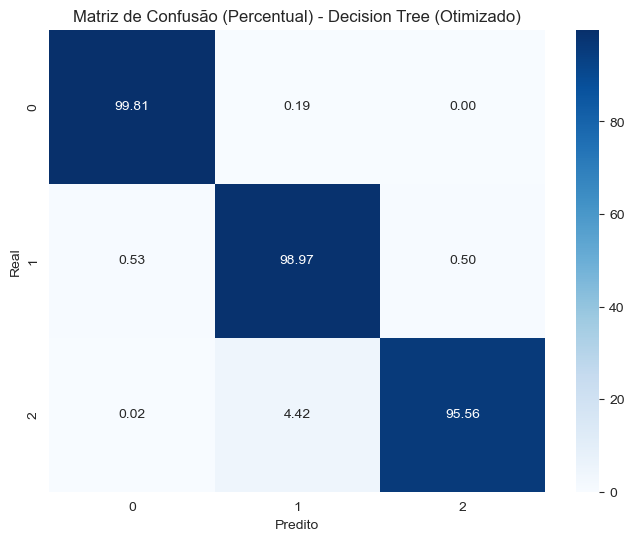

In [24]:
# Inicializando e avaliando o modelo Random Forest otimizado
modelo_rf_otimizado = RandomForestClassifier(
    random_state=1, 
    n_estimators=200,   # Aumentado o número de árvores
    max_depth=30,       # Limitando a profundidade
    min_samples_split=5, 
    min_samples_leaf=2, 
    n_jobs=4
)
avaliar_modelo("Random Forest (Otimizado)", modelo_rf_otimizado, X_train, X_test, y_train, y_test, otimizacao=True)

# Inicializando e avaliando o modelo Gradient Boosting otimizado
modelo_gb_otimizado = HistGradientBoostingClassifier(
    random_state=1, 
    learning_rate=0.05,  # Taxa de aprendizado reduzida
    max_iter=500,        # Mais iterações
    max_leaf_nodes=35,   # Limitando o número de folhas
    min_samples_leaf=2
)
avaliar_modelo("Gradient Boosting (Otimizado)", modelo_gb_otimizado, X_train, X_test, y_train, y_test, otimizacao=True)

# Rede Neural Rasa (MLP) Otimizado
modelo_mlp_otimizado = MLPClassifier(
    hidden_layer_sizes=(80, 40),  # Rede neural mais profunda
    activation='relu',            # ReLU para não linearidade eficiente
    solver='adam',                # Otimizador Adam para melhor convergência
    max_iter=400,                 # Ajustado para evitar overfitting
    learning_rate_init=0.001,     # Reduzido para convergência estável
    early_stopping=True,          # Parada antecipada para evitar overfitting
    random_state=1
)
avaliar_modelo("Rede Neural Rasa (MLP) (Otimizado)", modelo_mlp_otimizado, X_train, X_test, y_train, y_test, otimizacao=True)


# Inicializando e avaliando o modelo Extra Trees otimizado
modelo_et_otimizado = ExtraTreesClassifier(
    random_state=1, 
    n_estimators=300,  # Mais árvores na floresta
    max_depth=25,      # Limitando a profundidade
    min_samples_split=4, 
    min_samples_leaf=2, 
    n_jobs=4
)
avaliar_modelo("Extra Trees Classifier (Otimizado)", modelo_et_otimizado, X_train, X_test, y_train, y_test, otimizacao=True)

# Inicializando e avaliando o modelo Decision Tree otimizado
modelo_dt_otimizado = DecisionTreeClassifier(
    random_state=1, 
    max_depth=20,        # Limitando a profundidade
    min_samples_split=5, # Ajustado para melhorar generalização
    min_samples_leaf=2   # Ajustado para evitar overfitting
)
avaliar_modelo("Decision Tree (Otimizado)", modelo_dt_otimizado, X_train, X_test, y_train, y_test, otimizacao=True)


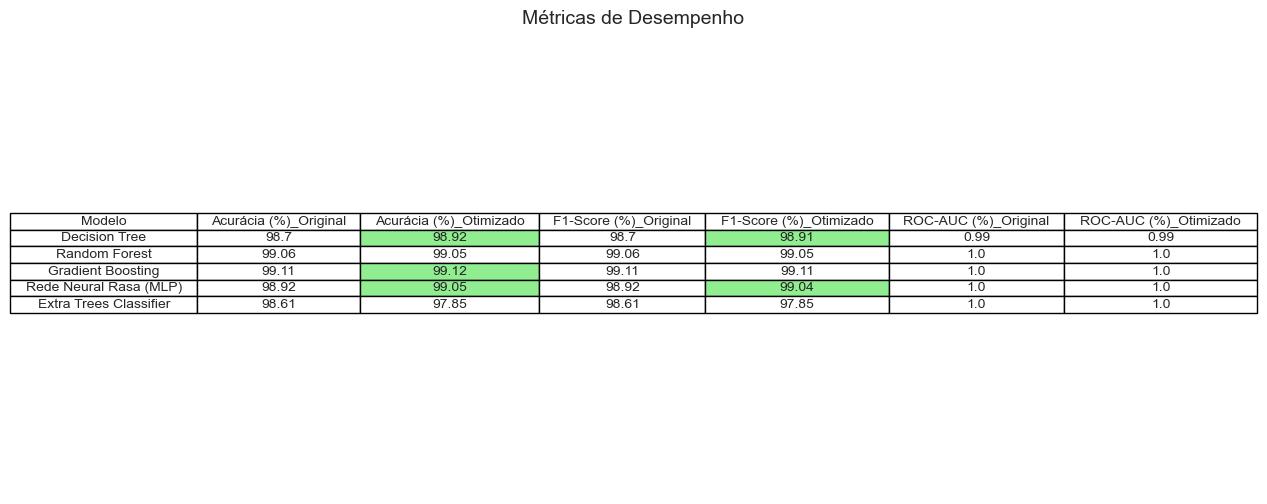

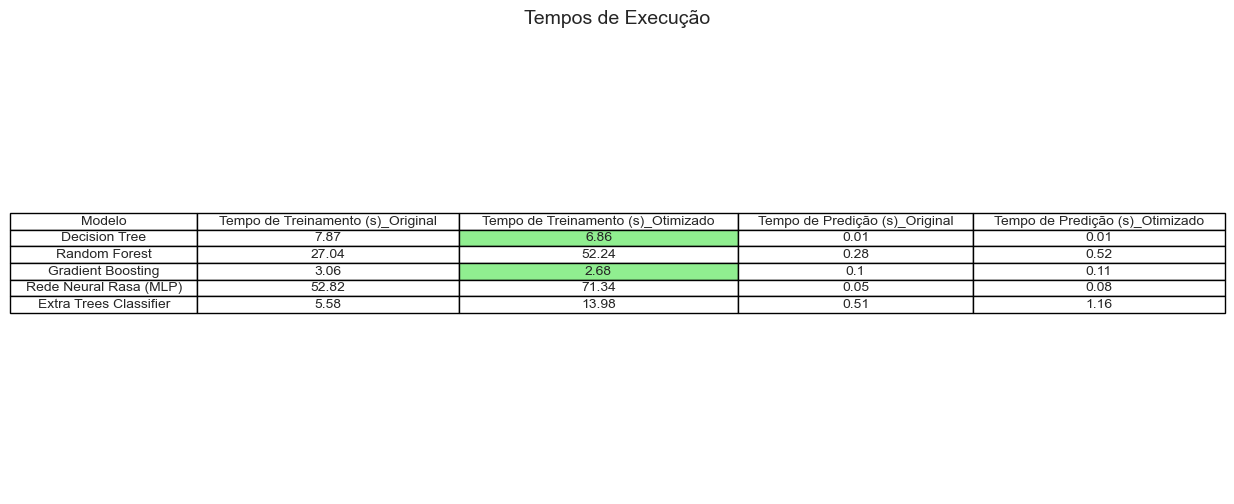

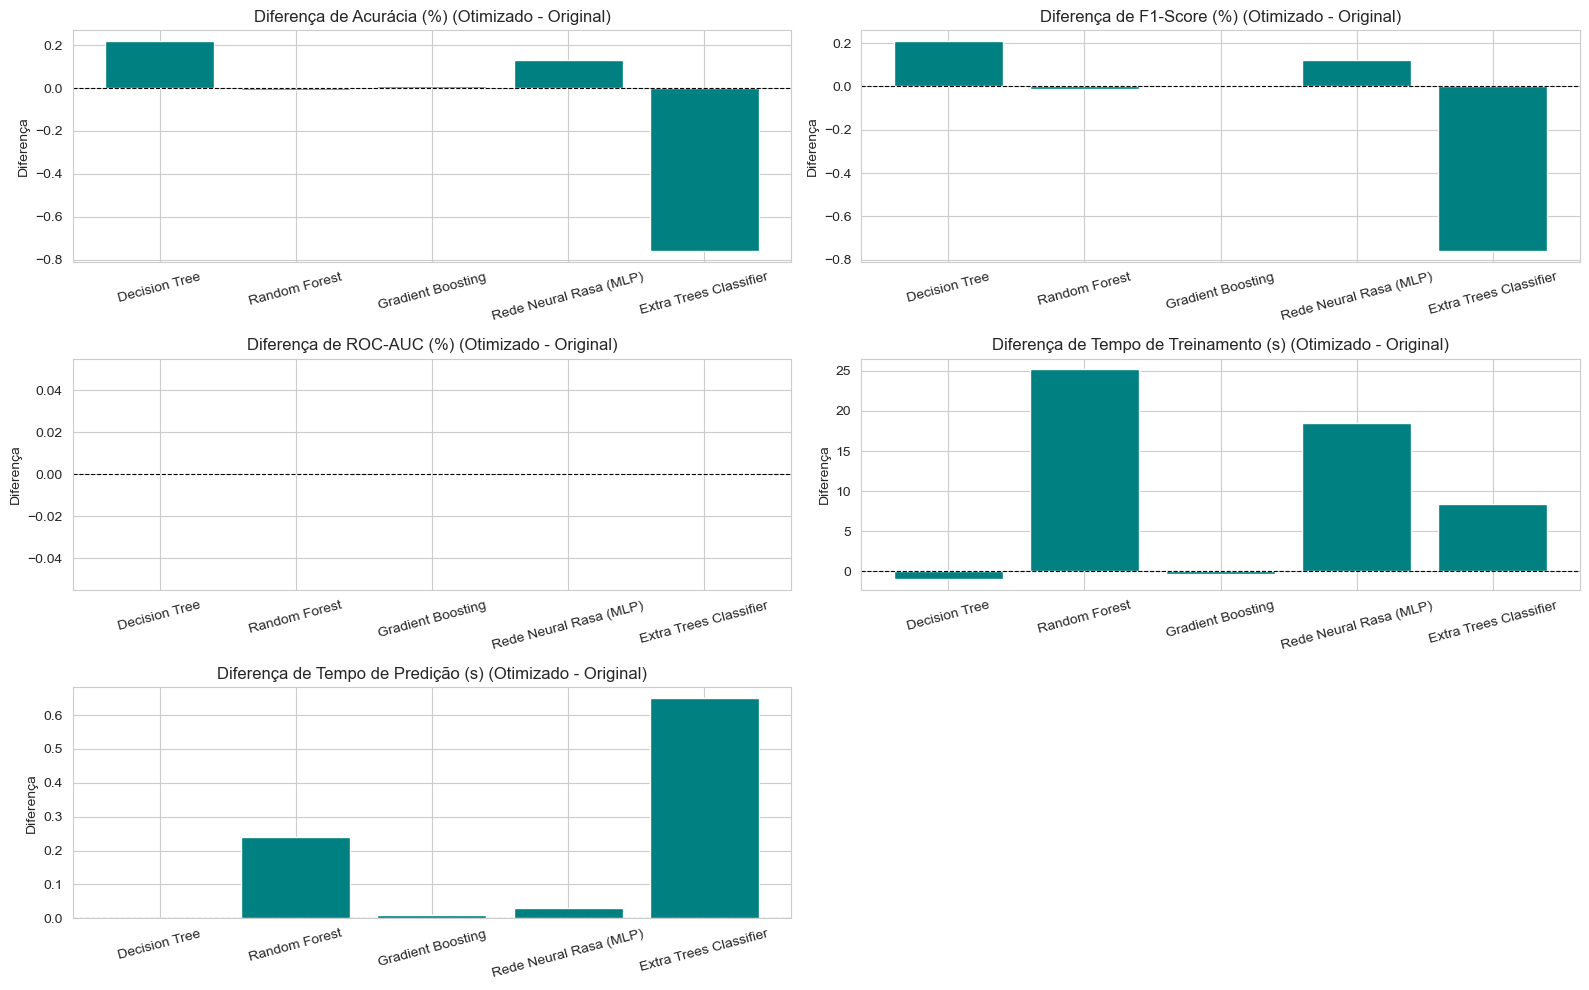

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convertendo os resultados para DataFrames
df_originais = pd.DataFrame(resultados_modelos_originais)
df_otimizados = pd.DataFrame(resultados_modelos_otimizados)

# Ajustando os nomes dos modelos otimizados para facilitar a comparação
df_otimizados['Modelo'] = df_otimizados['Modelo'].str.replace(" \\(Otimizado\\)", "", regex=True)

# Mesclando os DataFrames para comparação lado a lado
comparacao = pd.merge(
    df_originais,
    df_otimizados,
    on="Modelo",
    suffixes=("_Original", "_Otimizado")
)

# Calculando as diferenças
metricas = ["Acurácia (%)", "F1-Score (%)", "ROC-AUC (%)", "Tempo de Treinamento (s)", "Tempo de Predição (s)"]
for metrica in metricas:
    comparacao[f"Diferença {metrica}"] = comparacao[f"{metrica}_Otimizado"] - comparacao[f"{metrica}_Original"]

# Função para aplicar destaque nas células otimizadas melhores
def highlight_better(original, otimizado, is_metric=True):
    try:
        original = float(original)
        otimizado = float(otimizado)
        if (is_metric and otimizado > original) or (not is_metric and otimizado < original):
            return 'background-color: lightgreen; color: black;'
    except ValueError:
        pass
    return ''

# Função para plotar tabelas de métricas e tempos
def plot_table(data, cols, title, is_metric=True):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('tight')
    ax.axis('off')

    # Preparando os dados da tabela
    table_data = data[cols]
    cell_values = table_data.values.tolist()
    col_labels = table_data.columns.tolist()

    # Criando a tabela
    table = ax.table(
        cellText=cell_values,
        colLabels=col_labels,
        cellLoc='center',
        loc='center',
        colWidths=[0.2] * len(cols)
    )

    # Ajustando o estilo da tabela
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.auto_set_column_width(col=list(range(len(cols))))

    # Aplicando destaque nas células melhores
    for row_idx in range(1, len(cell_values) + 1):
        for col_idx in range(2, len(cols), 2):
            highlight = highlight_better(cell_values[row_idx - 1][col_idx - 1], cell_values[row_idx - 1][col_idx], is_metric)
            if highlight:
                table[(row_idx, col_idx)].set_facecolor("lightgreen")

    plt.title(title, fontsize=14)
    plt.show()

# Tabelas de Métricas de Desempenho
metricas_cols = ["Modelo", "Acurácia (%)_Original", "Acurácia (%)_Otimizado", "F1-Score (%)_Original", "F1-Score (%)_Otimizado", "ROC-AUC (%)_Original", "ROC-AUC (%)_Otimizado"]
plot_table(comparacao, metricas_cols, "Métricas de Desempenho", is_metric=True)

# Tabelas de Tempos de Execução
tempos_cols = ["Modelo", "Tempo de Treinamento (s)_Original", "Tempo de Treinamento (s)_Otimizado", "Tempo de Predição (s)_Original", "Tempo de Predição (s)_Otimizado"]
plot_table(comparacao, tempos_cols, "Tempos de Execução", is_metric=False)

# Visualização das diferenças em gráfico de barras
plt.figure(figsize=(16, 10))
for i, metrica in enumerate(metricas):
    plt.subplot(3, 2, i + 1)
    plt.bar(comparacao["Modelo"], comparacao[f"Diferença {metrica}"], color="teal")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
    plt.title(f"Diferença de {metrica} (Otimizado - Original)")
    plt.xticks(rotation=15)
    plt.ylabel("Diferença")

plt.tight_layout()
plt.show()



Tabela de Importância das Features:
| Feature   | Importância   |
|:----------|:--------------|
| redshift  | 0.554774      |
| i         | 0.0951276     |
| u         | 0.0917997     |
| g         | 0.0718892     |
| r         | 0.0258912     |
| z         | 0.0161912     |
| plate     | 0.00221962    |
| fiberid   | 0.0010849     |
| dec       | 0.000931368   |
| ra        | 0.000537875   |
| mjd       | 0.000331469   |
| run       | 0.000114896   |
| camcol    | 1.93188e-05   |
| field     | 4.06711e-06   |
| rerun     | 0             |


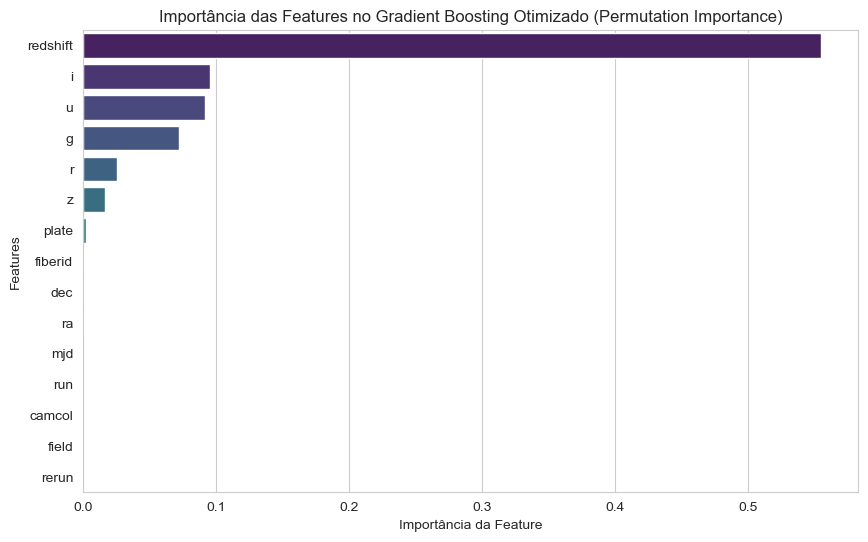

In [28]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Análise de Importância das Features ---
# Calculando a importância das features usando permutation_importance
result = permutation_importance(modelo_gb_otimizado, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Criando um DataFrame para facilitar a visualização
feature_importances = pd.DataFrame({
    'Feature': X_test.columns,
    'Importância': result.importances_mean
})

# Ordenando pela importância
feature_importances = feature_importances.sort_values(by='Importância', ascending=False)

# Exibindo a tabela de importância das features
print("\nTabela de Importância das Features:")
print(feature_importances.to_markdown(index=False, numalign="left", stralign="left"))

# Criando um gráfico de barras da importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importância', y='Feature', data=feature_importances, palette='viridis')
plt.xlabel("Importância da Feature")
plt.ylabel("Features")
plt.title("Importância das Features no Gradient Boosting Otimizado (Permutation Importance)")
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 1. Carregando os dados
feature_df = pd.read_csv('sdss.csv', skiprows=1)

# 2. Mapeando as classes para valores numéricos
feature_class_mapping = {'STAR': 0, 'GALAXY': 1, 'QSO': 2}
feature_df['class'] = feature_df['class'].map(feature_class_mapping)

# 3. Removendo linhas com valores ausentes
feature_df.dropna(inplace=True)

# 4. Selecionando as features
features = ['redshift', 'i', 'u', 'g', 'r', 'z']
feature_X = feature_df[features]
feature_y = feature_df['class']

# 5. Dividindo os dados em treino e teste
feature_X_train, feature_X_test, feature_y_train, feature_y_test = train_test_split(
    feature_X, feature_y, test_size=0.2, random_state=1, stratify=feature_y
)

# 6. Normalizando os dados
feature_scaler = MinMaxScaler()
feature_X_train = feature_scaler.fit_transform(feature_X_train)
feature_X_test = feature_scaler.transform(feature_X_test)

# 7. Treinando o modelo Gradient Boosting com features selecionadas
feature_modelo_gb_selecionado = HistGradientBoostingClassifier(
    random_state=1, 
    learning_rate=0.05,  # Taxa de aprendizado reduzida
    max_iter=500,        # Mais iterações
    max_leaf_nodes=35,   # Limitando o número de folhas
    min_samples_leaf=2
)
feature_modelo_gb_selecionado.fit(feature_X_train, feature_y_train)

# 8. Fazendo previsões
feature_y_pred = feature_modelo_gb_selecionado.predict(feature_X_test)

# 9. Calculando as métricas
feature_acuracia = accuracy_score(feature_y_test, feature_y_pred)
feature_f1 = f1_score(feature_y_test, feature_y_pred, average='weighted')
feature_roc_auc = roc_auc_score(feature_y_test, feature_modelo_gb_selecionado.predict_proba(feature_X_test), multi_class='ovr')

# 10. Exibindo as métricas
print(f"Acurácia: {feature_acuracia:.4f}")
print(f"F1-Score: {feature_f1:.4f}")
print(f"ROC-AUC: {feature_roc_auc:.4f}")


Acurácia: 0.9911
F1-Score: 0.9910
ROC-AUC: 0.9985
